### Jorge Diego Garcia Torres


# Libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import norm

In [ ]:
maindf =pd.read_csv('txn_train.csv')

In [ ]:
maindf.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1004122,P00238542,M,18-25,19,C,4+,0,5,14.0,NaN,3522
1,1002348,P00111142,M,51-55,12,C,4+,1,1,15.0,16.0,11654
2,1002931,P00042842,M,18-25,4,B,2,0,5,NaN,NaN,3456
3,1003808,P00195342,M,26-35,7,A,2,1,2,5.0,NaN,13288
4,1004950,P0099242,M,26-35,16,A,1,1,8,14.0,NaN,5915


Information

In [ ]:
maindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     50000 non-null  int64  
 1   Product_ID                  50000 non-null  object 
 2   Gender                      50000 non-null  object 
 3   Age                         50000 non-null  object 
 4   Occupation                  50000 non-null  int64  
 5   City_Category               50000 non-null  object 
 6   Stay_In_Current_City_Years  50000 non-null  object 
 7   Marital_Status              50000 non-null  int64  
 8   Product_Category_1          50000 non-null  int64  
 9   Product_Category_2          34343 non-null  float64
 10  Product_Category_3          15240 non-null  float64
 11  Purchase                    50000 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 4.6+ MB


statistics

In [ ]:
maindf.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.000000e+04,50000.000000,50000.000000,50000.000000,34343.000000,15240.000000,50000.000000
mean,1.003024e+06,8.138340,0.409600,5.376000,9.816178,12.633596,9310.391120
std,1.728671e+03,6.529577,0.491765,3.908602,5.089338,4.133144,5025.193953
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001507e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5861.000000
50%,1.003065e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8063.500000
75%,1.004476e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12086.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


unique elements

In [ ]:
len(maindf['User_ID'].unique())

5509

In [ ]:
len(maindf['Product_ID'].unique())

3084

In [ ]:
maindf['Age'].unique()

array(['18-25', '51-55', '26-35', '36-45', '46-50', '55+', '0-17'],
      dtype=object)

In [ ]:
maindf['Occupation'].unique()

array([19, 12,  4,  7, 16,  1,  0, 17, 20,  2, 15,  5,  3, 14, 11,  6, 10,
       13,  9, 18,  8])

In [ ]:
maindf['City_Category'].unique()

array(['C', 'B', 'A'], dtype=object)

In [ ]:
maindf['Stay_In_Current_City_Years'].unique()

array(['4+', '2', '1', '3', '0'], dtype=object)

In [ ]:
maindf['Product_Category_1'].unique()

array([ 5,  1,  2,  8,  4,  6,  3, 19, 15, 13, 11, 12, 16, 18, 10, 20,  7,
       14,  9, 17])

In [ ]:
maindf['Product_Category_2'].unique()

array([14., 15., nan,  5., 16., 13.,  4.,  6.,  2., 11.,  8., 18., 10.,
       12., 17.,  9.,  3.,  7.])

In [ ]:
maindf['Product_Category_2'].unique()

array([14., 15., nan,  5., 16., 13.,  4.,  6.,  2., 11.,  8., 18., 10.,
       12., 17.,  9.,  3.,  7.])

In [ ]:
maindf['Product_Category_3'].unique()

array([nan, 16., 18.,  9., 12., 14., 17.,  5., 15., 13.,  8.,  6., 10.,
        4.,  3., 11.])

# Exploratory Data Analysis

Auxiliary function for pie charts

In [ ]:
def pie_chart(column ,explode , labels):
    plt.figure(figsize=(12, 6))
    plt.pie(maindf[column].value_counts(),
            explode=explode,   
            startangle=90, 
            autopct='%1.1f%%',
            labels=labels, 
            colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99'],
            pctdistance=.6,
            textprops={'fontsize': 20})
    
    centre_circle = plt.Circle((0,0),0.7,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    plt.axis('equal')  
    plt.tight_layout()
    plt.show()

There are more male buyers than women

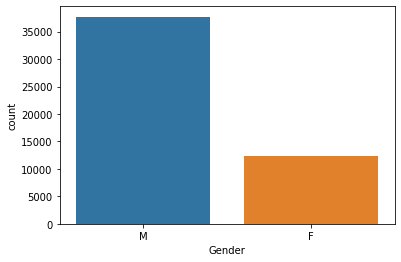

In [ ]:
sns.countplot(x = 'Gender',data = maindf)

Gender : 75.4% is male Vs 24.6


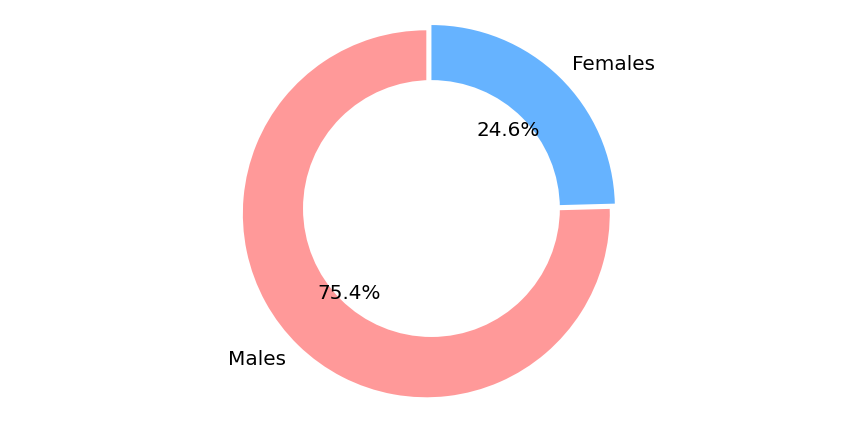

In [ ]:
pie_chart("Gender" ,[0.04,0] , ['Males','Females'])

Also, there are more single people buyeres than married people



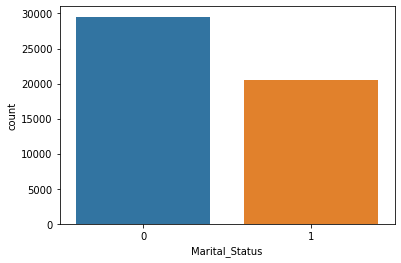

In [ ]:
sns.countplot(x = "Marital_Status",data = maindf)

Marital_status : 59% Not married Vs 41% married





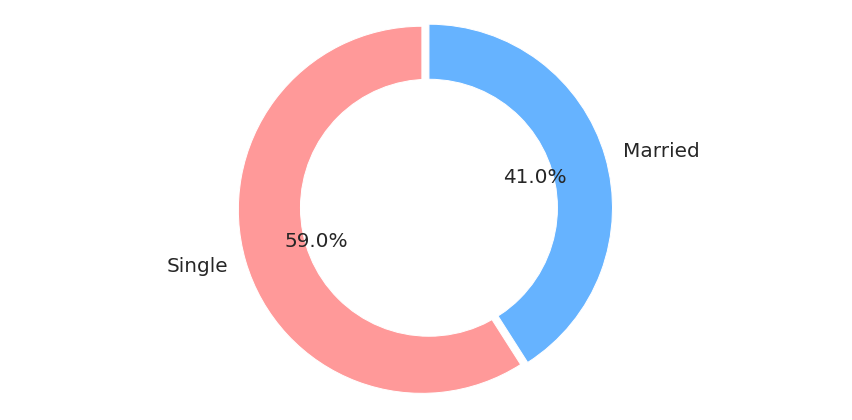

In [ ]:
pie_chart("Marital_Status" ,[0.04,0] , ['Single','Married'])

City_Category : Maximum buyers belong to City_Category=B (42.1%) and min to City_Category=A (26.8%)





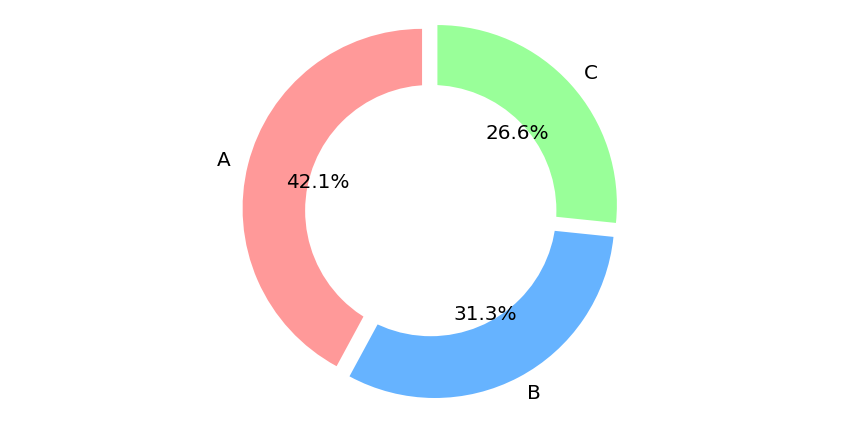

In [ ]:
pie_chart("Product_category_1" ,[0.05,0.05,0.05] , ['A','B',"C"])

Regarding category 1: More thing are bought from section 1,2,3





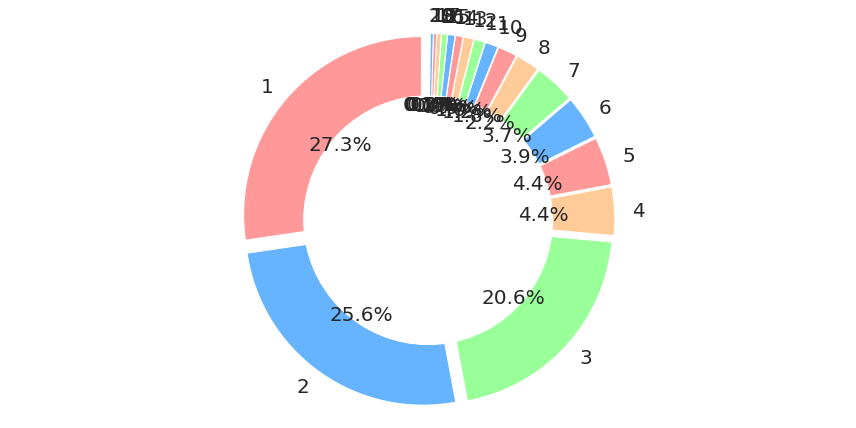

In [ ]:
pie_chart("Product_Category_1" ,[0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05] , ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20'])

Maximum buyers belong to Occupation category = 4 and minimum buyers belong to category = 8

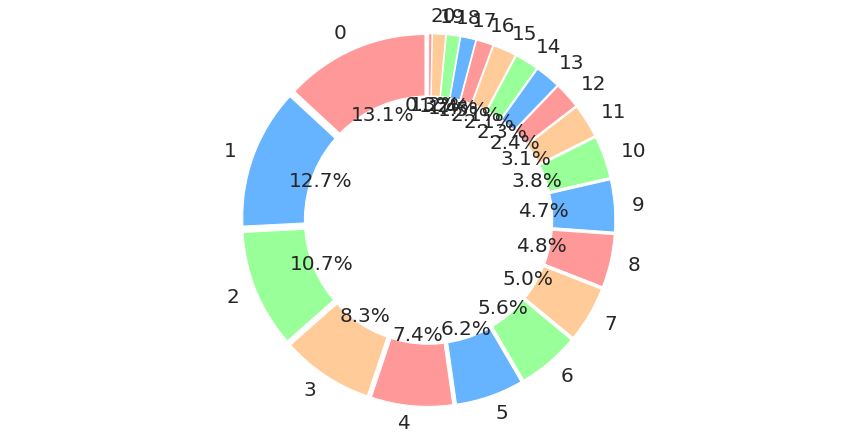

In [ ]:
pie_chart("Occupation" ,[0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05] , ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20'])

Age : Maximum buyers(39.9%) belong to age group 26-35 and minimum (2.7%) belong to 0-17 age group

most purchases are made by people between 18 - 45 years


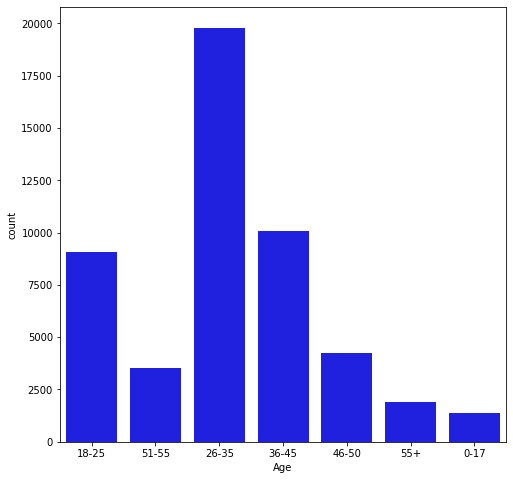

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(x = "Age", data = maindf, color= 'blue')

Stay_In_Current_City_Years : Maximum buyers have stayed in city for 1 year and minimum buyers for 0 years (i.e. recently moved)

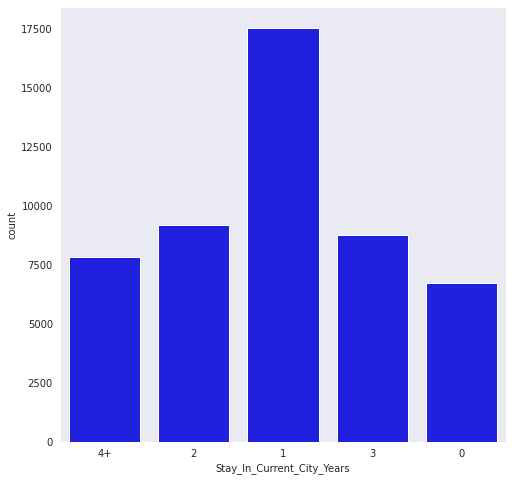

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(x = "Stay_In_Current_City_Years", data = maindf, color= 'blue')

 ### It can be clearly seen that the data have outliers and certain skew

- Maximum frequency (>50k times)can be seen betwee Purchase value (5000-8600)
- Few amounts as high as 23961 is also seen
- Min value is 12

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


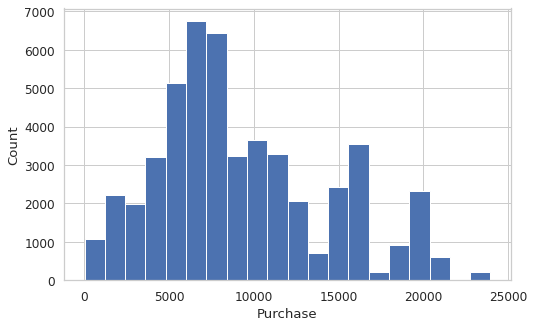

In [ ]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    maindf['Purchase'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Purchase', ylabel='Count');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Purchase violinplot')

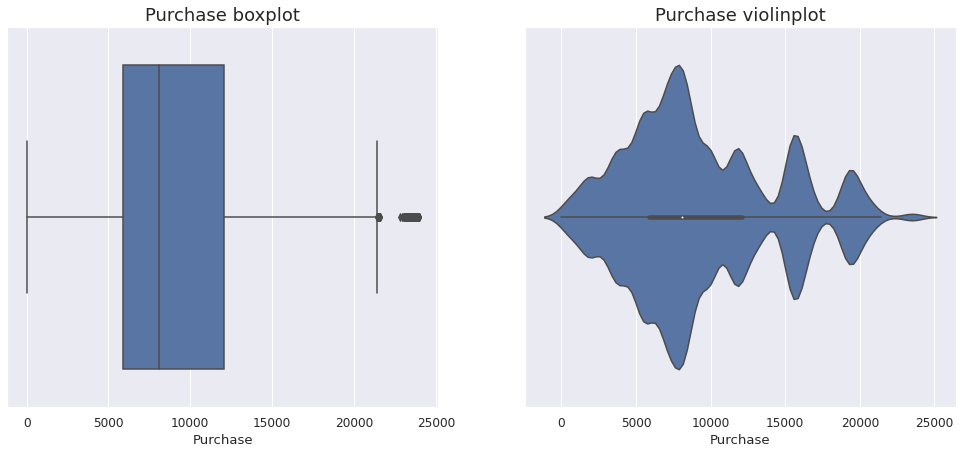

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[17,7])
sns.set(style="whitegrid")
sns.boxplot(x = maindf["Purchase"],ax=ax[0]).set_title("Purchase boxplot", fontsize=18)
sns.violinplot(maindf["Purchase"],ax=ax[1]).set_title("Purchase violinplot", fontsize=18)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


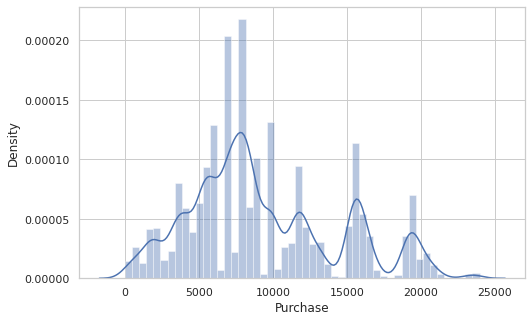

In [ ]:
 sns.distplot(maindf['Purchase'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


The mu 9310.39112 and Sigma 5025.143700992554 for the curve


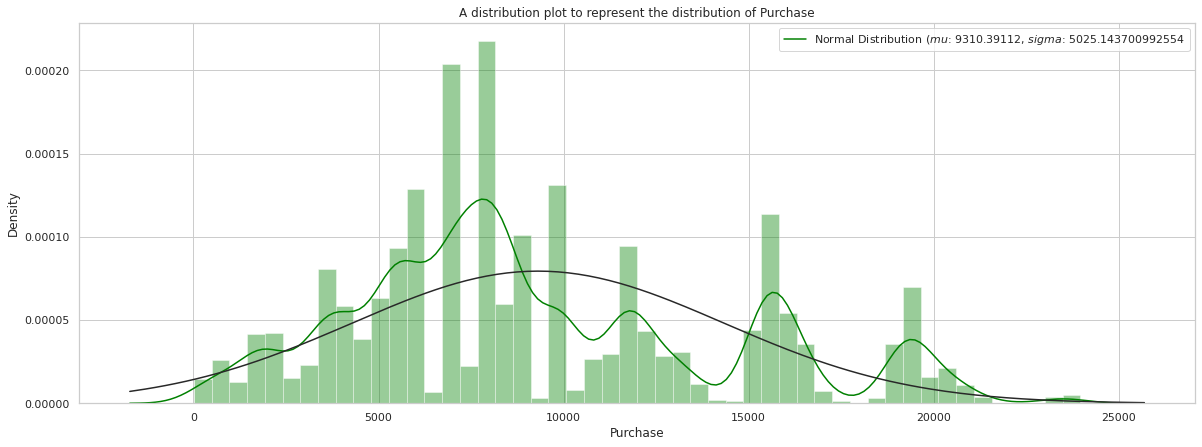

In [ ]:
plt.rcParams['figure.figsize'] = (20, 7)
sns.distplot(maindf['Purchase'], color = 'green', fit = norm)

mu, sigma = norm.fit(maindf['Purchase']) 
print("The mu {} and Sigma {} for the curve".format(mu, sigma))

plt.title('A distribution plot to represent the distribution of Purchase')
plt.legend(['Normal Distribution ($mu$: {}, $sigma$: {}'.format(mu, sigma)], loc = 'best')
plt.show()

Maximum frequency of product id can be seen from P110000 to P120000

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


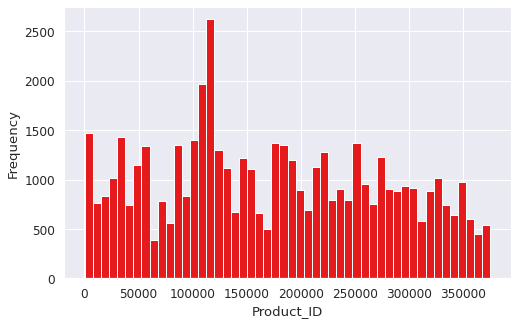

In [ ]:
maindf['Product_ID'] = maindf['Product_ID'].apply(lambda x: x.replace('P', '')
                                if isinstance(x, str) else x).astype(int)

maindf['Product_ID'] = maindf['Product_ID'].astype('int')
sns.distplot(
    maindf['Product_ID'], norm_hist=False, kde=False, bins=50, hist_kws={"alpha": 1}
).set(xlabel='Product_ID', ylabel='Frequency');

In the age groups between 18 and 45 there are more men


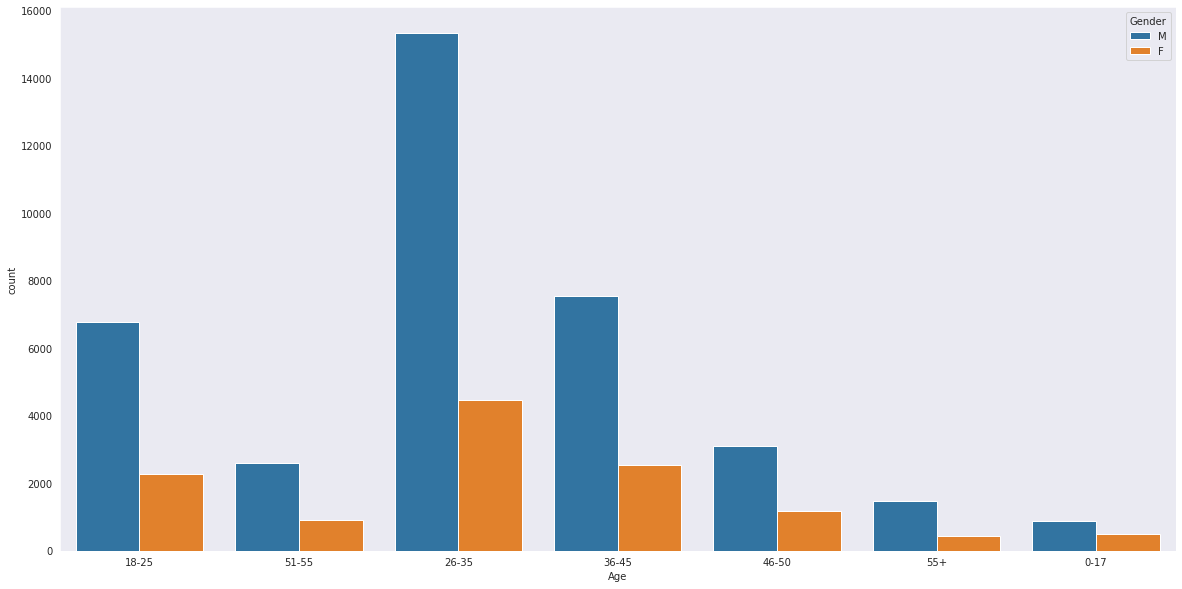

In [ ]:
sns.set_style('dark')
plt.figure(figsize= (20,10))
sns.countplot(x='Age',hue = "Gender",data = maindf)

more men regardless of the city

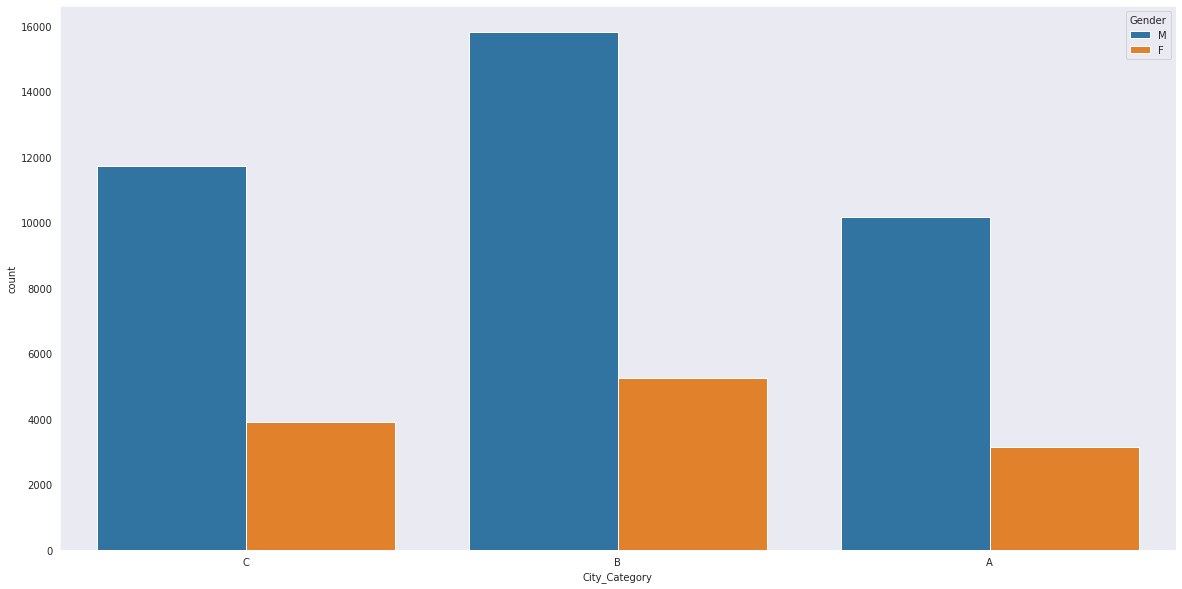

In [ ]:
sns.set_style('dark')
plt.figure(figsize= (20,10))
sns.countplot(x='City_Category',hue = "Gender",data = maindf)

more men regardless of occupation

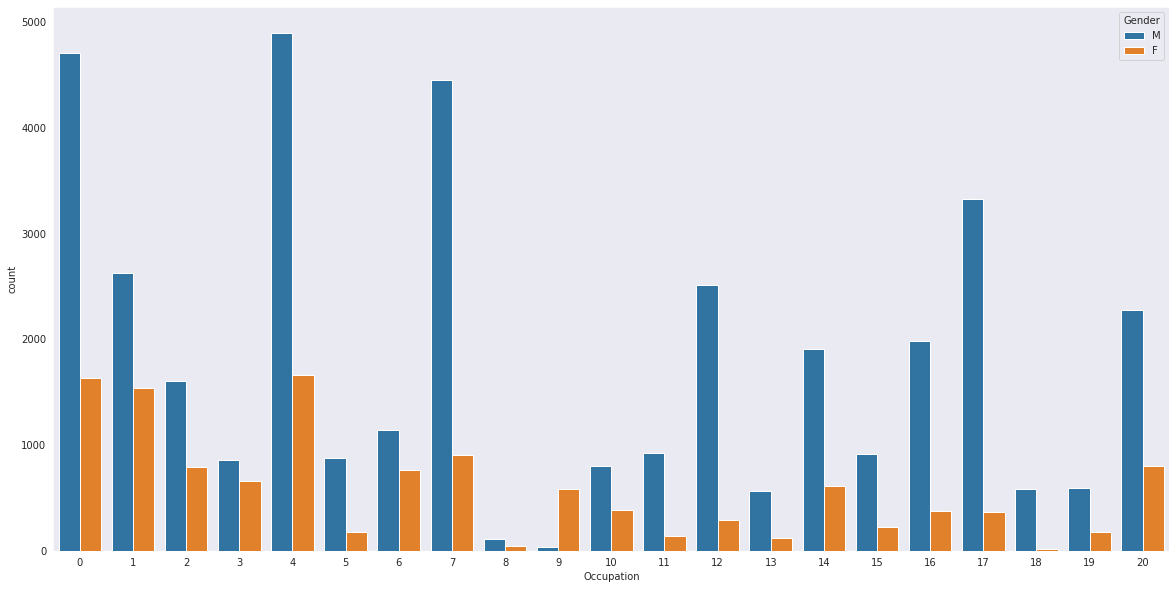

In [ ]:
sns.set_style('dark')
plt.figure(figsize= (20,10))
sns.countplot(x='Occupation',hue = "Gender",data = maindf)

city B dominates in occupation 0,4,7

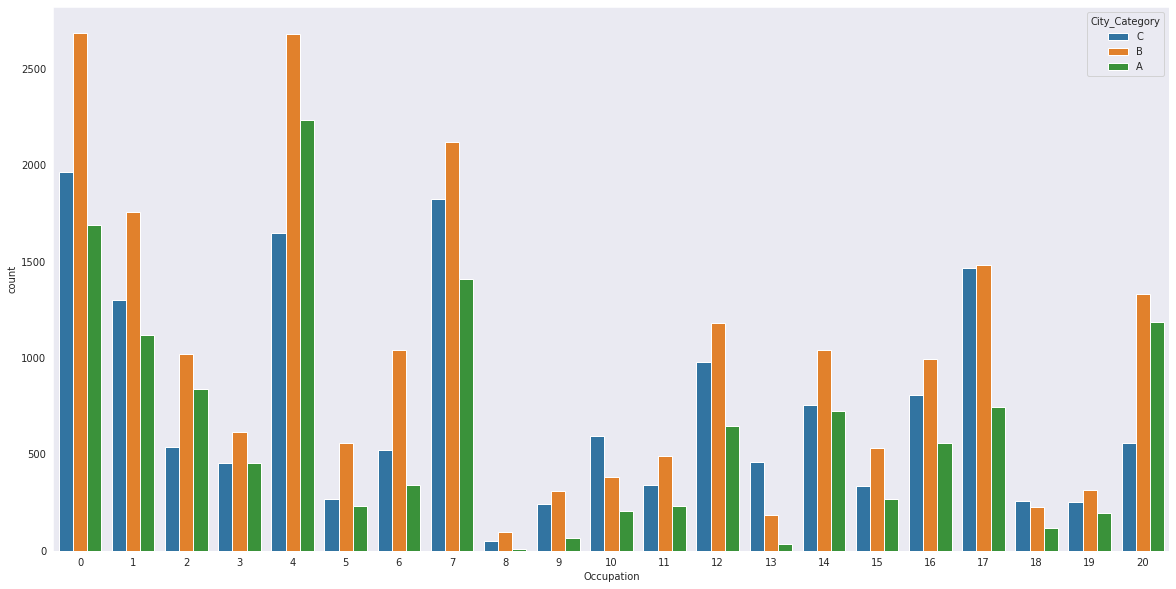

In [ ]:
sns.set_style('dark')
plt.figure(figsize= (20,10))
sns.countplot(x='Occupation',hue = "City_Category",data = maindf)

the most popular occupations are 4,0,7

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


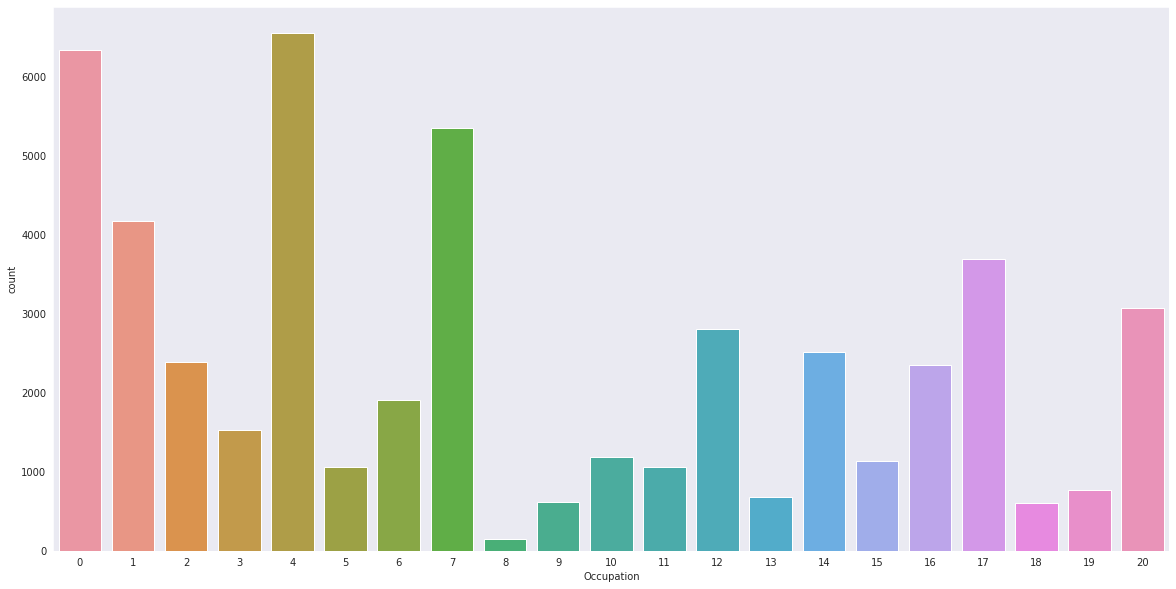

In [ ]:
sns.set_style('dark')
plt.figure(figsize = (20,10))
sns.countplot('Occupation',data = maindf)

Here everything seems to be balanced, but those who spend the most are the group with the age between 51-55



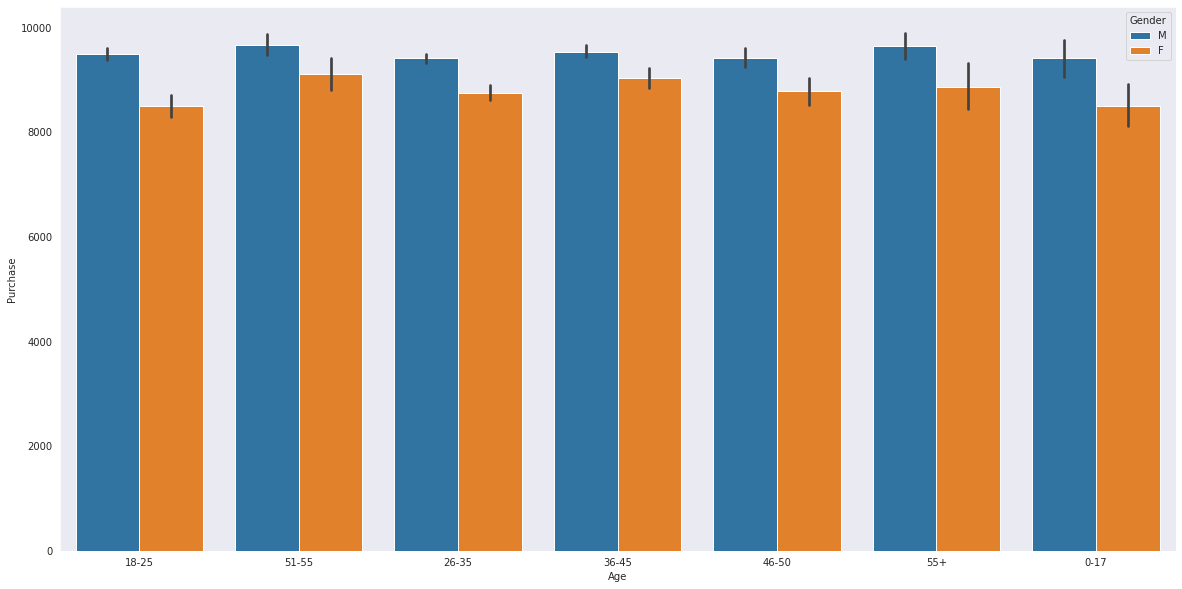

In [ ]:
plt.figure(figsize = (20,10))
sns.barplot(x='Age', y='Purchase',hue = 'Gender',data= maindf)

the most purchased products of category1 are 1,5,8 

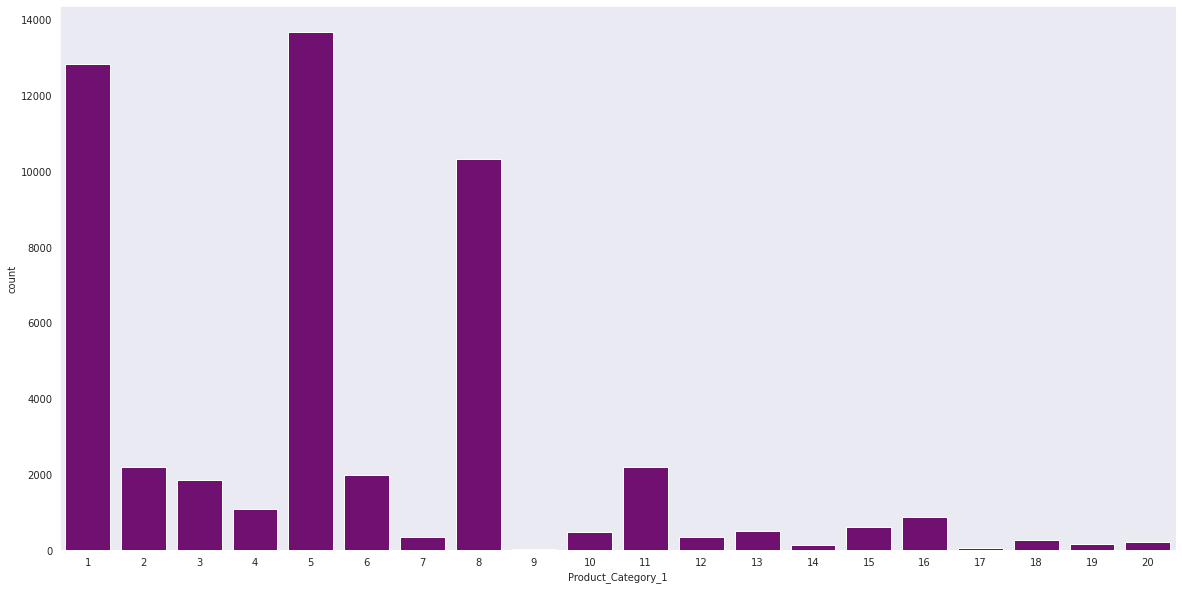

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x = 'Product_Category_1',color = 'purple',data = maindf)

the most purchased products of category1 are 8,2,14,15,16


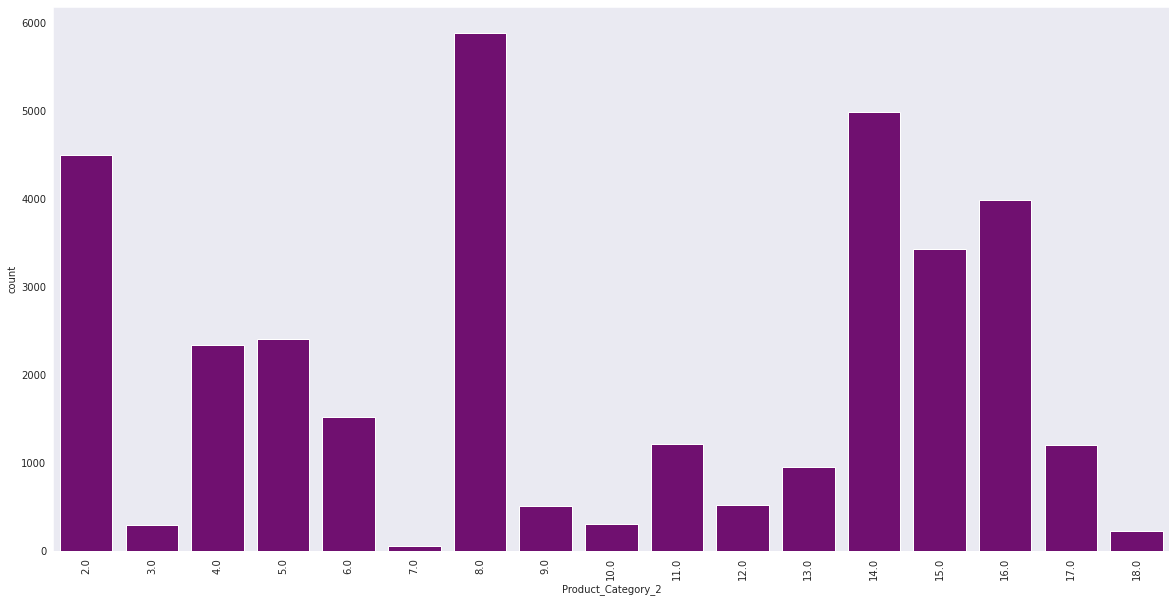

In [ ]:
plt.figure(figsize=(20,10))
plt.xticks(rotation = 90)
sns.countplot(x = 'Product_Category_2',color = 'purple',data = maindf)

the most purchased products of category3 are 15,16


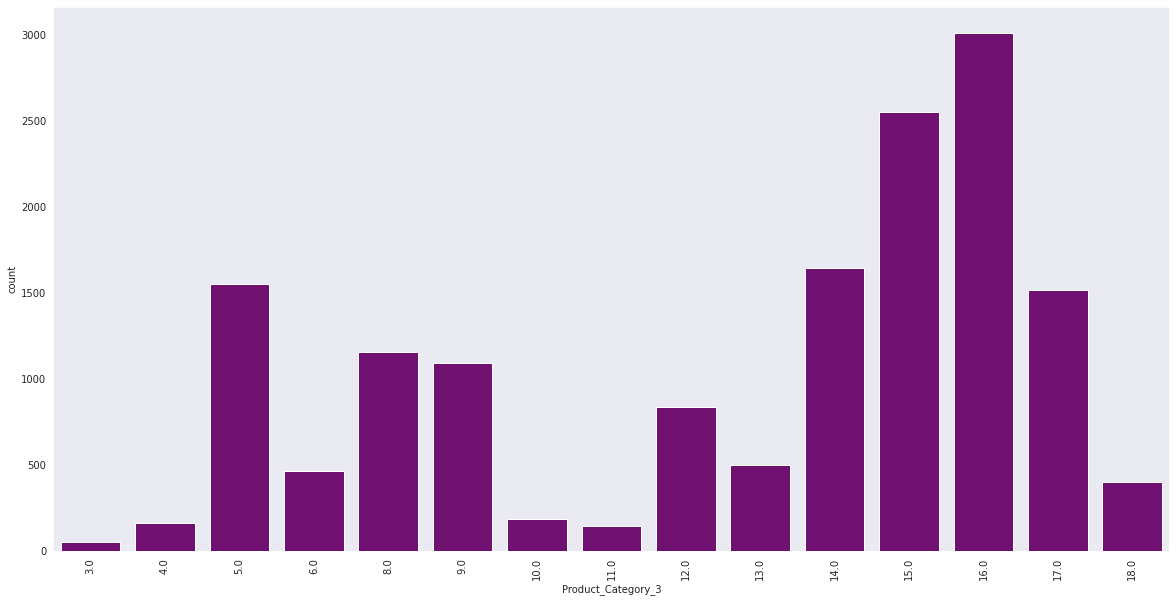

In [ ]:
plt.figure(figsize=(20,10))
plt.xticks(rotation = 90)
sns.countplot(x = 'Product_Category_3',color = 'purple',data = maindf)

### Correlation matrices

### No categorical variables coded

In [ ]:
newmain=maindf.drop(["Product_ID","User_ID"],axis=1)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 <a list of 6 Text major ticklabel objects>)

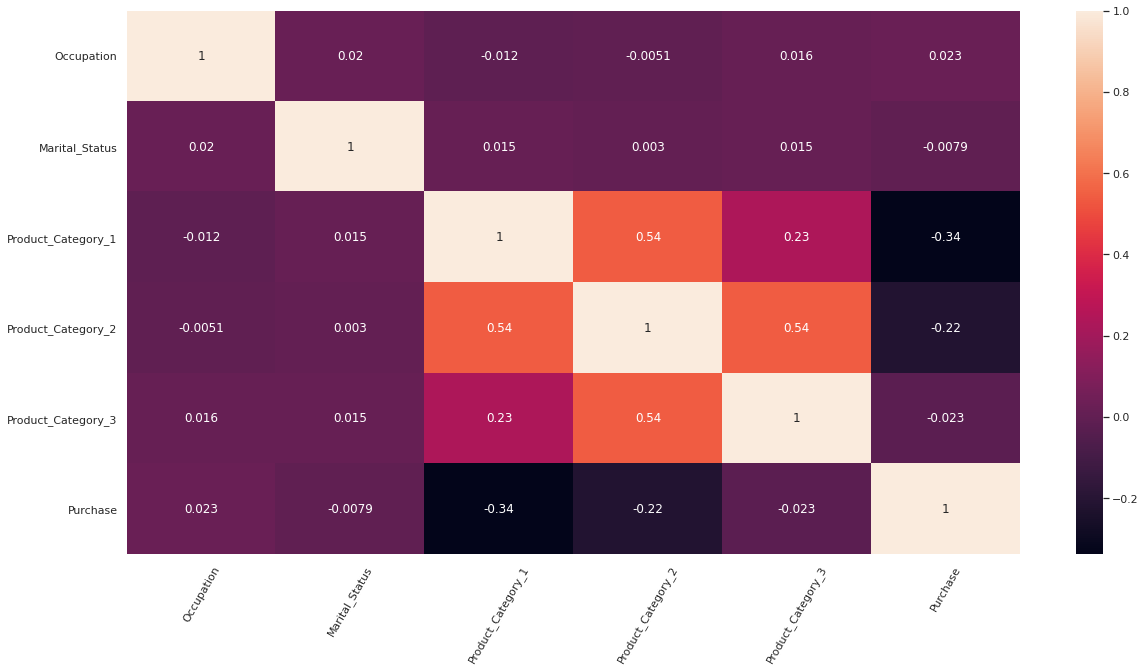

In [ ]:
plt.figure(figsize = (20,10))
sns.heatmap(newmain.corr(),annot = True)
plt.xticks(rotation  = 60)

## adding average per product, product count, average purchase per user

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 <a list of 9 Text major ticklabel objects>)

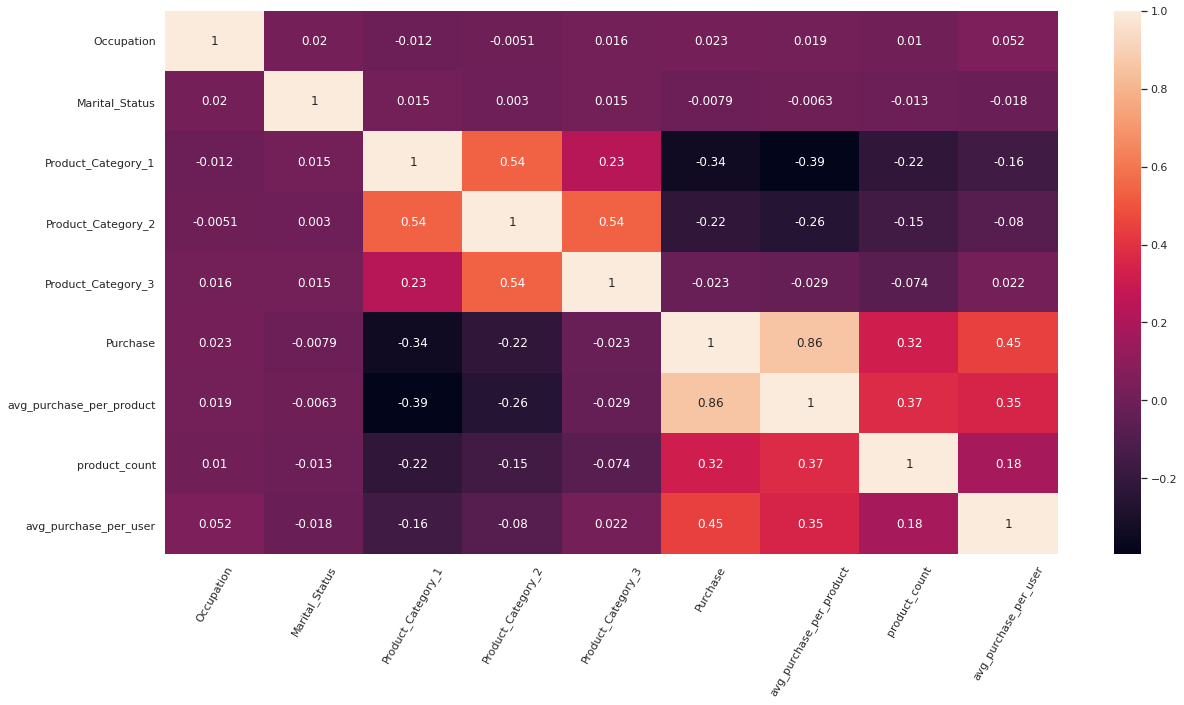

In [ ]:
avg_purchasepro=pd.DataFrame(maindf.groupby(['Product_ID'])['Purchase'].mean())
avg_purchasepro.reset_index(inplace=True)
avg_purchaseusr=pd.DataFrame(maindf.groupby(['User_ID'])['Purchase'].mean())
avg_purchaseusr.reset_index(inplace=True)

product_c=pd.DataFrame(maindf['Product_ID'].value_counts())
product_c.reset_index(inplace=True)
product_c=product_c.rename(columns={'index':'Product_ID','Product_ID':'Product_count'})

newmain['avg_purchase_per_product']=maindf['Product_ID'].map(avg_purchasepro.set_index('Product_ID')['Purchase'])
newmain['product_count']=maindf['Product_ID'].map(product_c.set_index('Product_ID')['Product_count'])
newmain['avg_purchase_per_user']=maindf['User_ID'].map(avg_purchaseusr.set_index('User_ID')['Purchase'])

plt.figure(figsize = (20,10))
sns.heatmap(newmain.corr(),annot = True)
plt.xticks(rotation  = 60)

## One-hot codification of some categorical variables

In [ ]:
categorical_columns = ["Gender","Age", "Occupation", "City_Category", "Stay_In_Current_City_Years",
                       "Marital_Status"]
newmain = pd.get_dummies(newmain, columns= categorical_columns)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5]), <a list of 24 Text major ticklabel objects>)

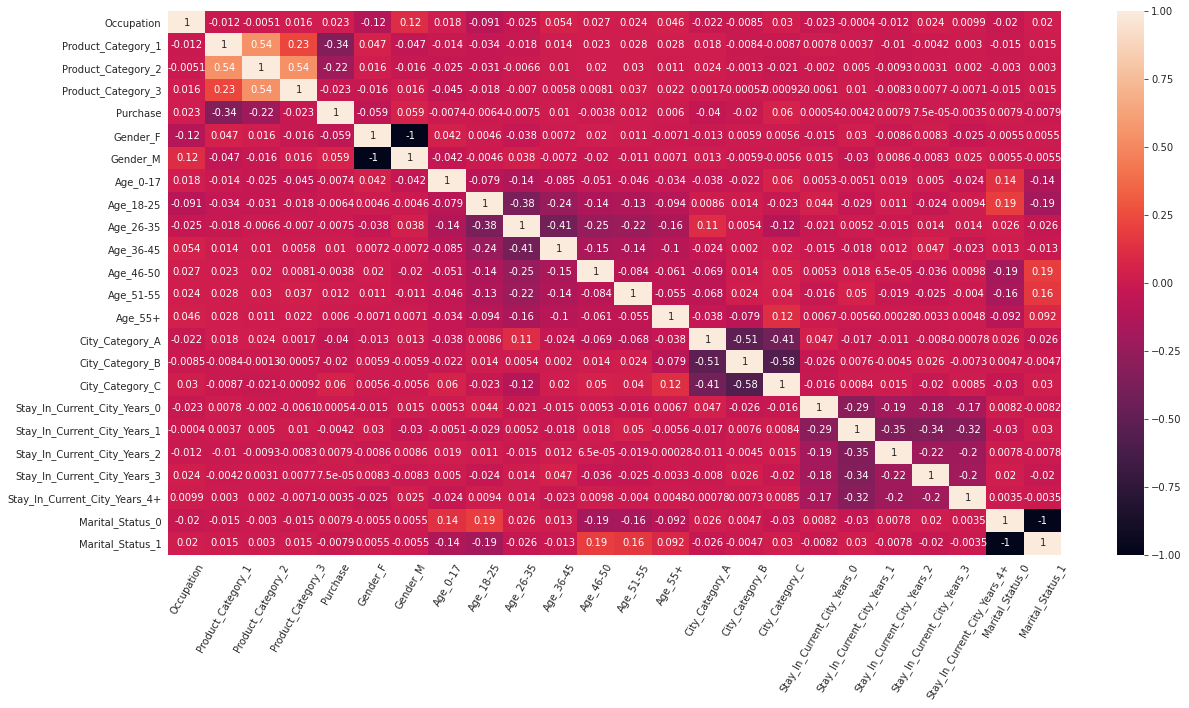

In [ ]:
plt.figure(figsize = (20,10))
sns.heatmap(newmain.corr(),annot = True)
plt.xticks(rotation  = 60)

For occupation 9 there are only women buyers or they are majority



/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


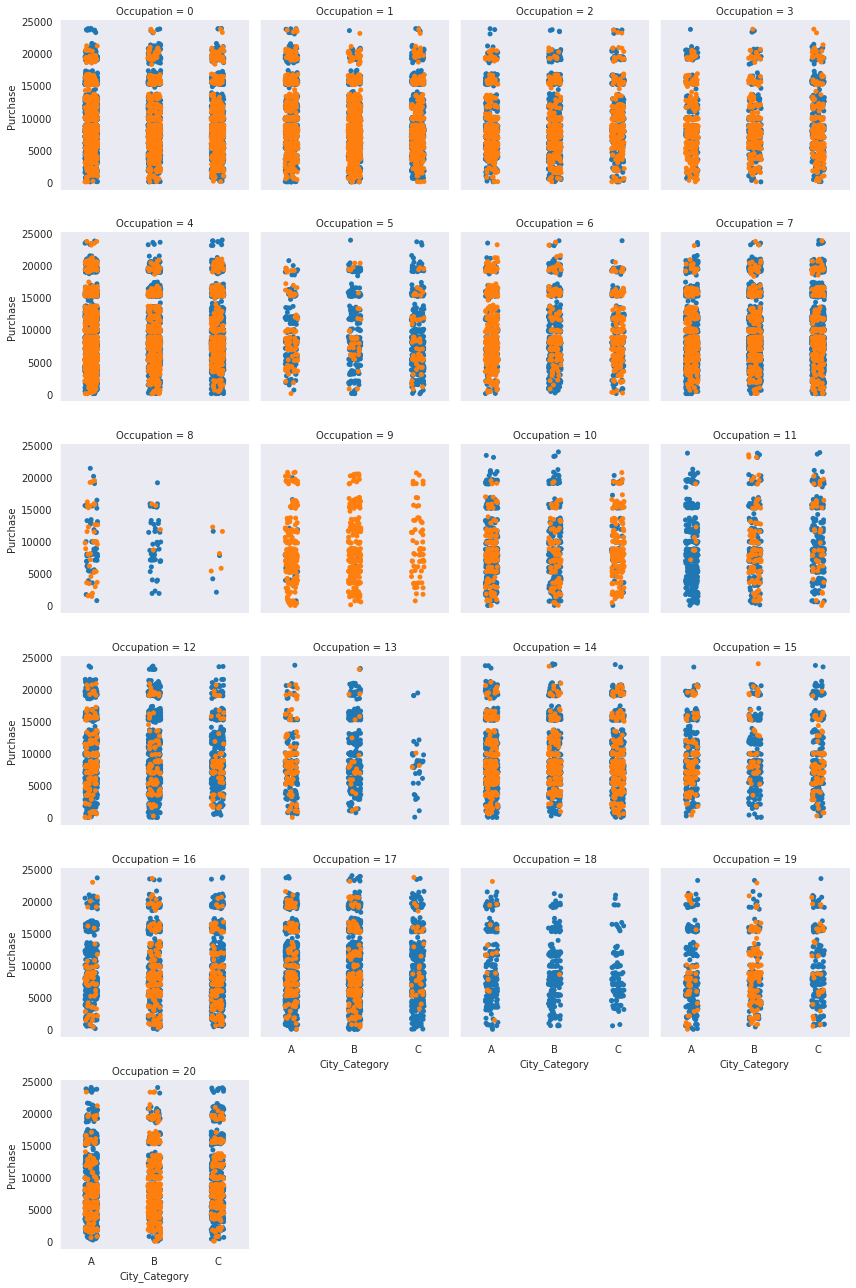

In [ ]:
cond = sns.FacetGrid(data=maindf, col='Occupation', hue='Gender', col_wrap=4)
cond.map(sns.stripplot, 'City_Category', 'Purchase');

In general, men spend more

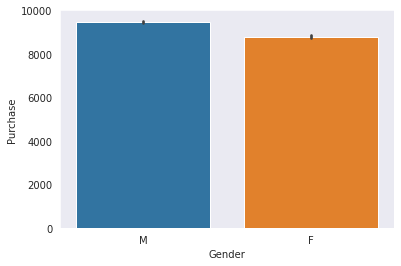

In [ ]:
sns.barplot(x = 'Gender',y = 'Purchase',data = maindf)

approximately same purchases regardless of marital status and genre

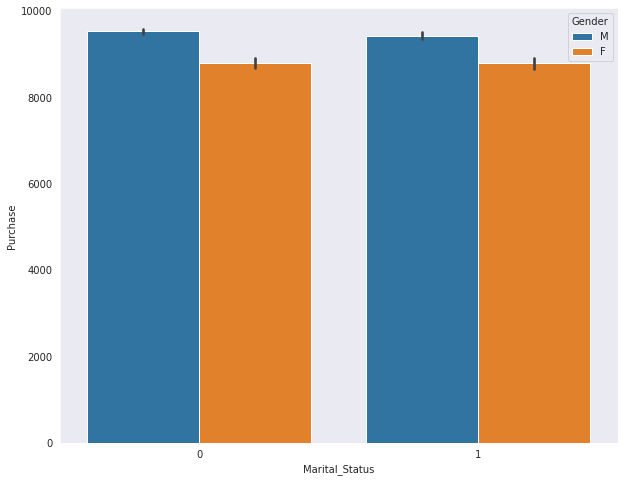

In [ ]:
plt.figure(figsize = (10,8))
sns.barplot(x='Marital_Status',y='Purchase',hue = 'Gender' ,  data = maindf)

It is spent approximately the same with respect to the occupation




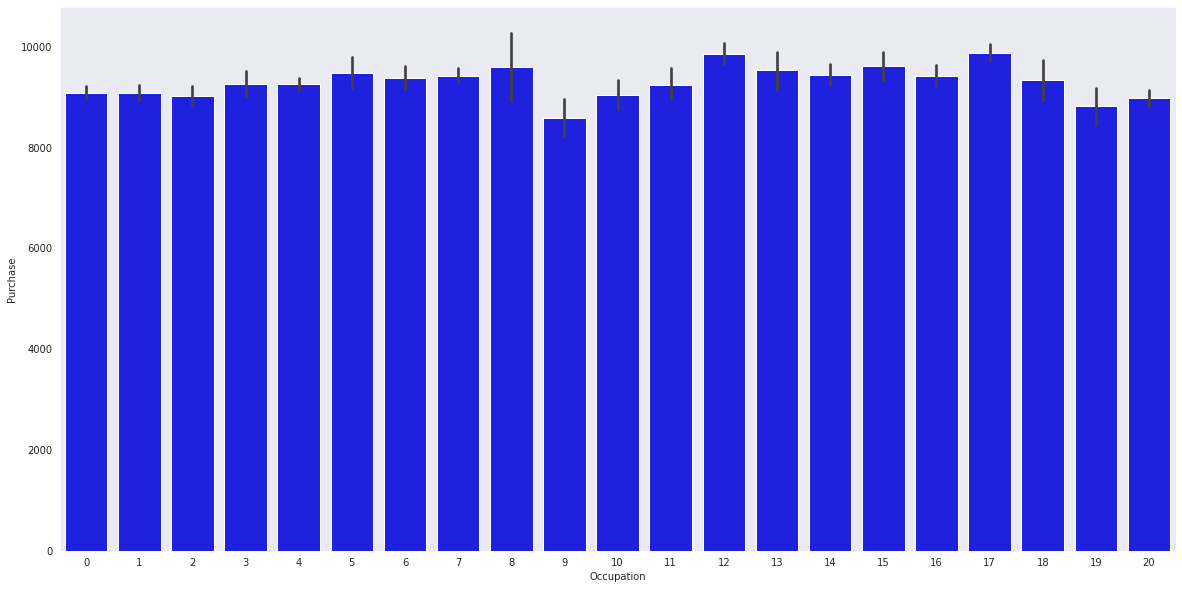

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x='Occupation',y='Purchase',color='blue',data = maindf)

It seems that people from city C spend a little more, in general men spend more than women

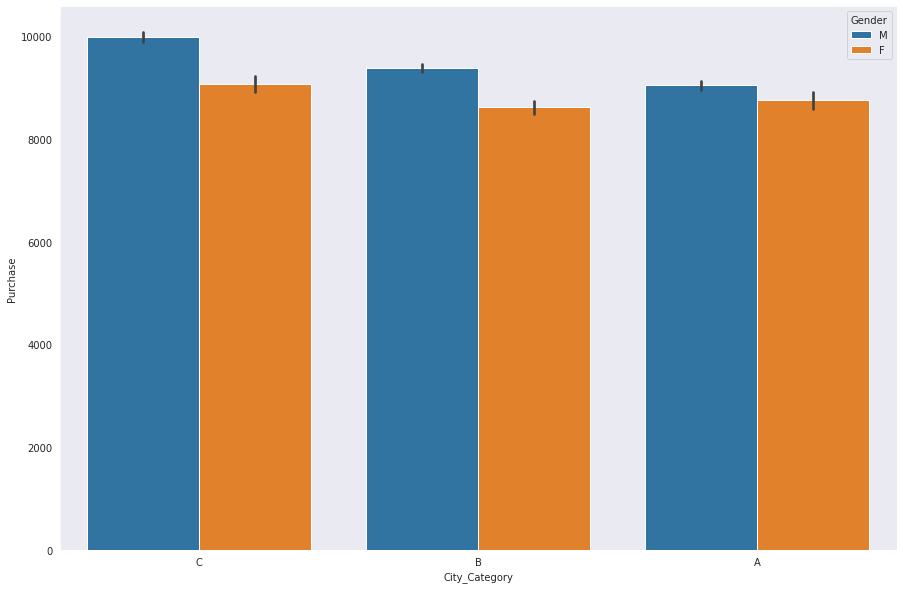

In [ ]:
plt.figure(figsize = (15,10))
sns.barplot(x='City_Category',y='Purchase',hue='Gender',data = maindf)

Men spend more regardless of city, age group, or marital status



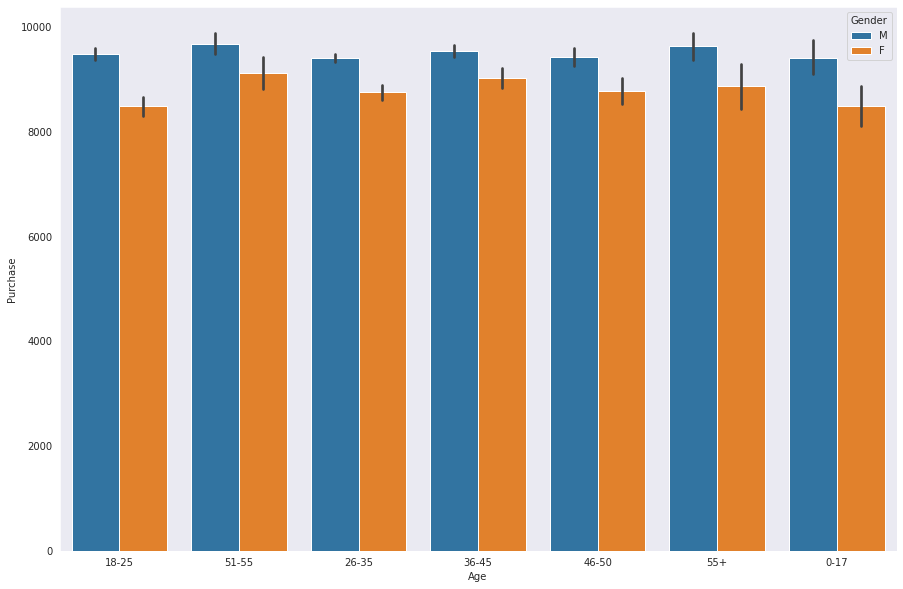

In [ ]:
plt.figure(figsize = (15,10))
sns.barplot(x='Age',y='Purchase',hue='Gender',data = maindf)

The 46-50 age groups who are married spend more than the unmarried



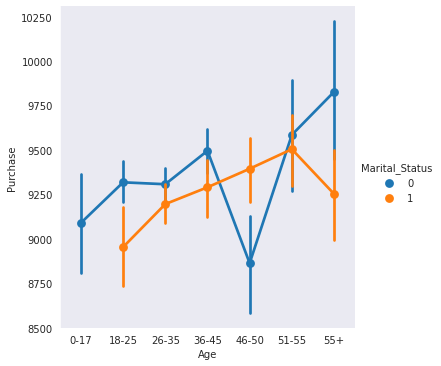

In [ ]:
sns.catplot(x='Age',y='Purchase',kind='point',data=maindf,hue='Marital_Status', order=['0-17', '18-25', '26-35', '36-45',  '46-50', '51-55', '55+'])

-On average in cities B and C sales are made by men

-In city A and in the age group of those between 46-50 years old are women


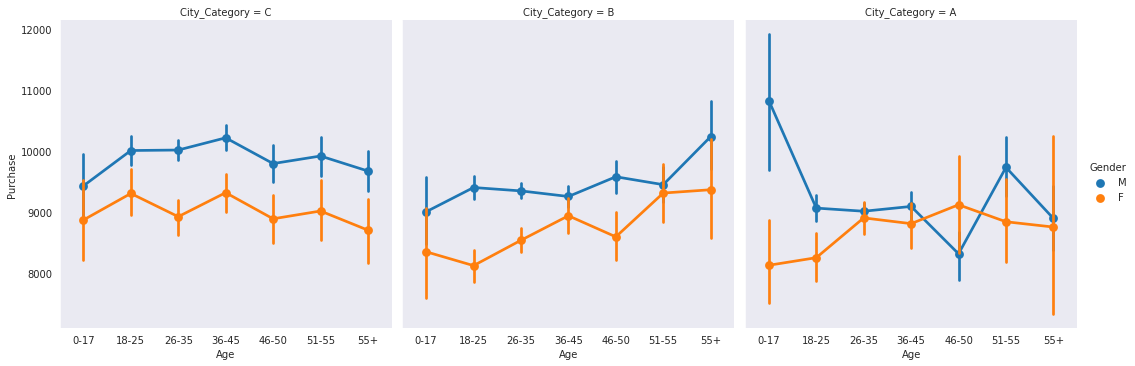

In [ ]:
sns.catplot(x='Age',y='Purchase',kind='point',data=maindf,col='City_Category',hue='Gender', order=['0-17', '18-25', '26-35', '36-45',  '46-50', '51-55', '55+'])

- The group between 51 are the ones who spend the most
- 0-17 those who spend the least as they are minors

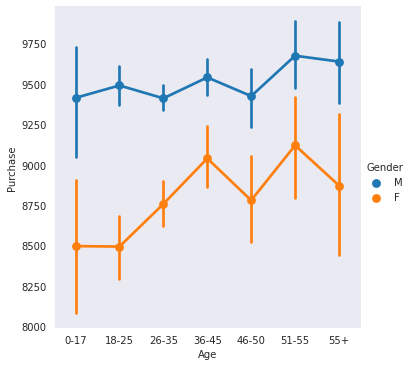

In [ ]:
sns.catplot(x='Age',y='Purchase',kind='point',data=maindf, order=['0-17', '18-25', '26-35', '36-45',  '46-50', '51-55', '55+'],hue='Gender')

Each city spends the same regardless of the years in which it has lived in that place

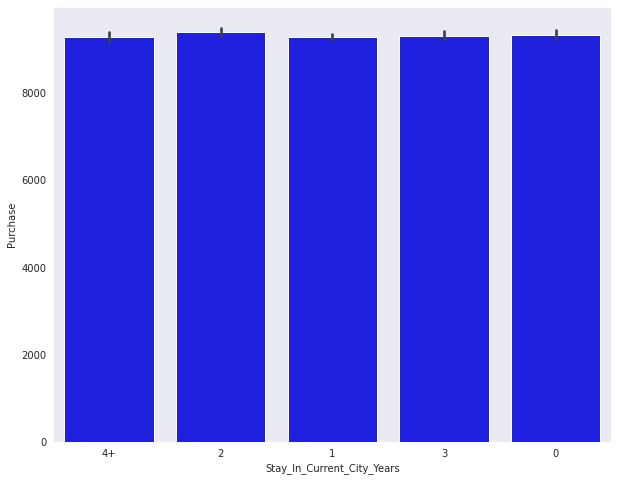

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x='Stay_In_Current_City_Years',y='Purchase',color = 'blue',data = maindf)

On average everyone spends the same

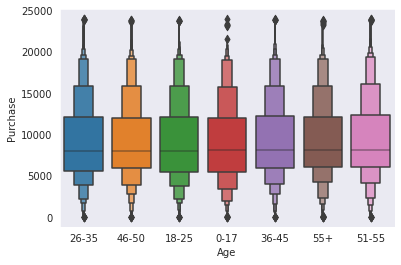

In [ ]:
sorted = maindf.groupby(['Age'])['Purchase'].median().sort_values()
sns.boxenplot(x=maindf['Age'], y=maindf['Purchase'], order=list(sorted.index))

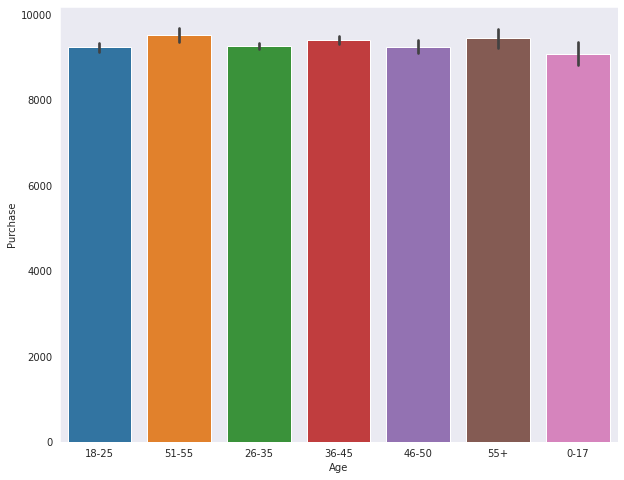

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x='Age',y='Purchase',data = maindf)

Although it was seen that there are more of certain products, others are the most purchased ... the same for other categories

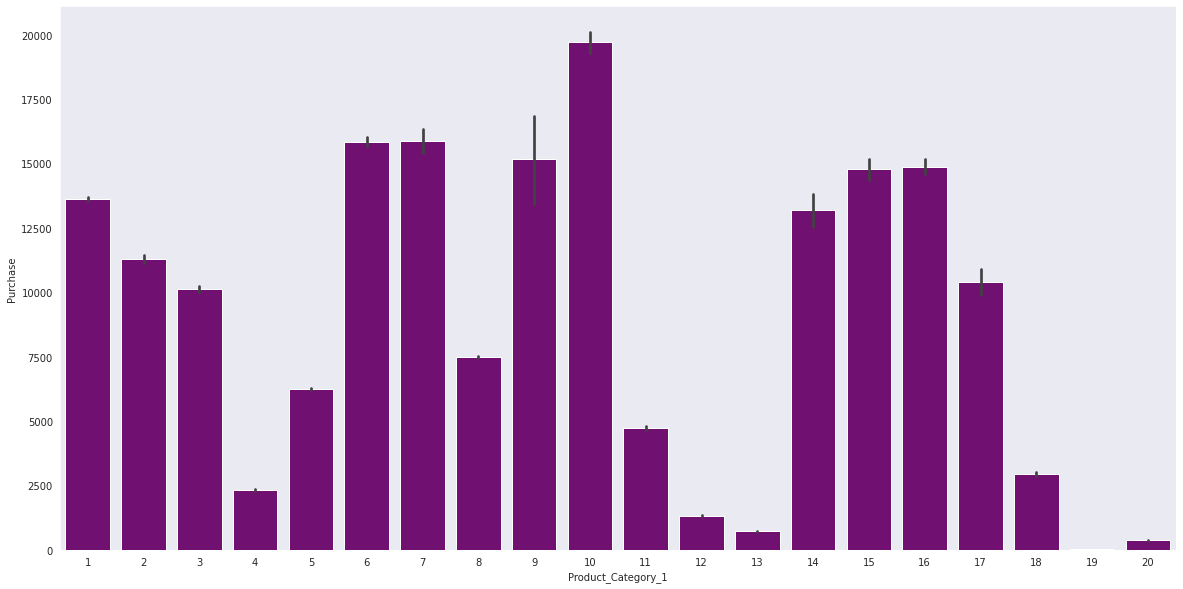

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x='Product_Category_1',y = 'Purchase', color = 'purple',
            data = maindf)

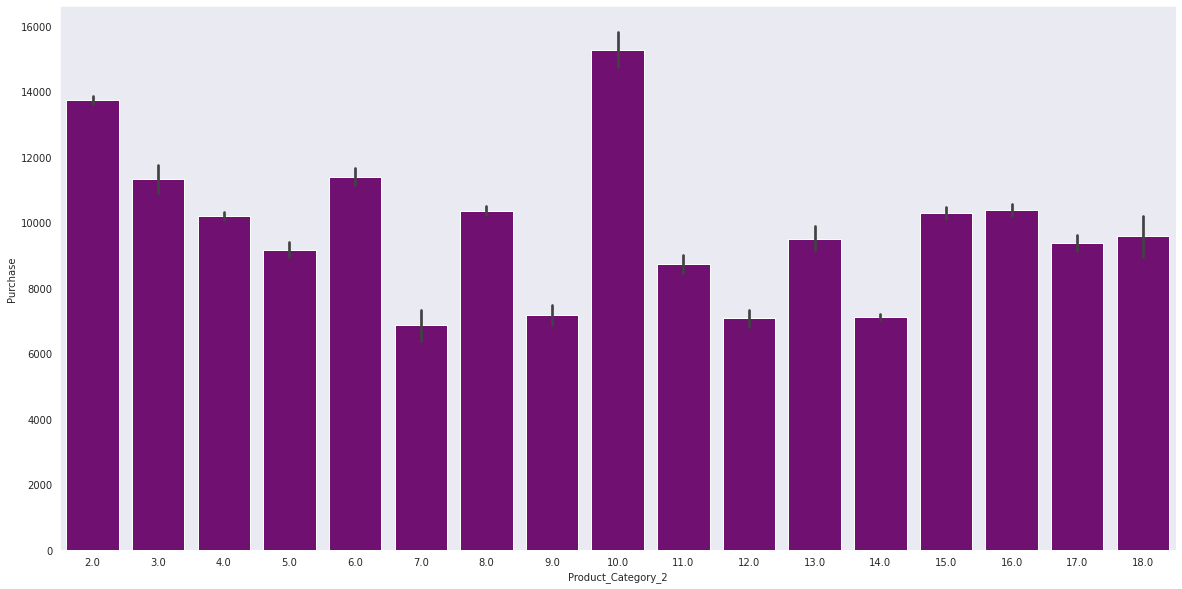

In [ ]:
plt.figure(figsize=(20,10))
sns.set_style('dark')
sns.barplot(x='Product_Category_2',y = 'Purchase', color = 'purple',
            data = maindf)

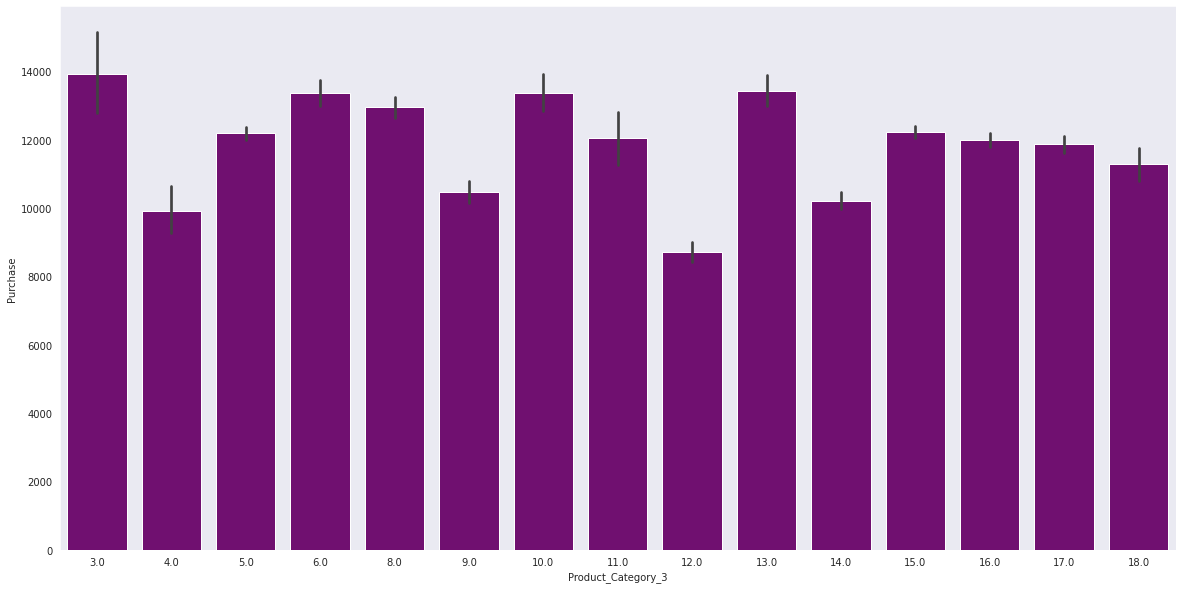

In [ ]:
plt.figure(figsize=(20,10))
sns.set_style('dark')
sns.barplot(x='Product_Category_3',y = 'Purchase', color = 'purple',
            data = maindf)

It can be seen by city which age group spends the most

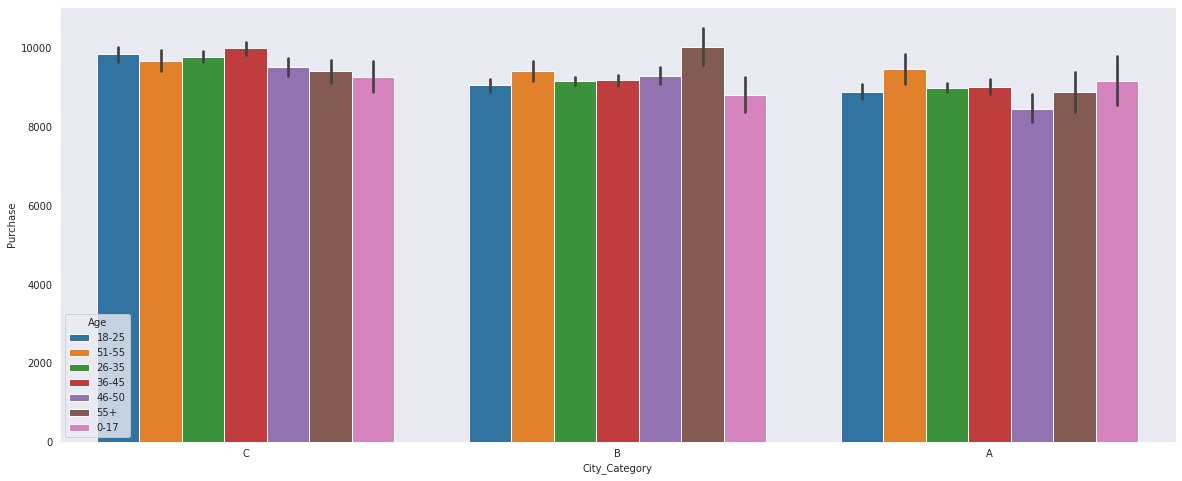

In [ ]:
plt.figure(figsize = (20,8))
sns.barplot(x='City_Category', y='Purchase',hue = 'Age',data = maindf)

## Para los datos con Nan

In [ ]:
missingv = maindf.isnull().sum().sort_values(ascending = False)
missingv = missingv[missingv > 0]/maindf.shape[0]
print(f'{missingv *100} %')

Product_Category_3    69.520
Product_Category_2    31.314
dtype: float64 %


In [ ]:
maindf[maindf['Product_ID']=='P00238542']

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1004122,P00238542,M,18-25,19,C,4+,0,5,14.0,NaN,3522
189,1003719,P00238542,M,26-35,1,C,3,1,5,14.0,NaN,6971
1368,1000223,P00238542,M,26-35,17,B,4+,0,5,14.0,NaN,8890
2773,1003913,P00238542,M,18-25,17,B,0,0,5,14.0,NaN,5392
4406,1003017,P00238542,F,36-45,9,B,1,0,5,14.0,NaN,5430
7187,1005813,P00238542,M,26-35,7,A,1,1,5,14.0,NaN,5366
7299,1005286,P00238542,M,46-50,16,B,0,0,5,14.0,NaN,5283
10718,1004089,P00238542,M,26-35,7,A,1,0,5,14.0,NaN,7080
11549,1000424,P00238542,M,26-35,17,A,3,0,5,14.0,NaN,5160
12225,1005043,P00238542,F,18-25,6,C,2,0,5,14.0,NaN,6881


# Conclusiones
# Conclusions

## Inferencia y estrategias

- 75% son hombres
- 59% estan casados
- la mayoria pertencen a la ciudad B
- la mayoria de las cosas compradas pertenecen a la seccion 1,2,3 de la categoria 1
- la mayoria de los compradores pertenecen a la ocupacion 4 
- la mayoria de los compradores tienen entre 26-35 anos de edad
- tambien han estado en su ciudad por 1 ano o mas
------------------------------------------
- En los grupos cuyas edades estan entre 18 a 45 hay mas hombres
- hay mas hombres independientemente de la ciudad, ocupacion
- En la ciudad B dominan las ocupaciones 0,4,7
- todos los grupos de todas las edades gastan aproximadamente lo mismo
- los productos mas comprados de la categoria 1 son 1,5,8
- los productos mas comprados de la categoria 2 son 8,2,14,15,16
- los productos mas comprados de la categoria 3 son 15,16
- para la ocupacion 9 solo hay mujeres compradoras o ellas son mayoria
- En general los hombres gastan mas independientemente del genero, ciudad, ocupacion, grupos de edad
- los grupos cuyas edades estan entre los 46-50 y estan casados gastan mas que los no casados
- En promedio las compras hechas en las ciudades B y C fueron realizadas por hombres
- En la ciudad A y en el grupo cuyas edades estan entre los 46-50 son mujeres
- En cada ciudad gastan lo mismo independientemente de los anos que han vivido en dicho lugar



## Inference and strategies

- Gender : 75.4% is male Vs 24.6
- Marital_status : 59% Not married Vs 41% married
- City_Category : Maximum buyers belong to City_Category=B (42.1%) and min to City_Category=A (26.8%)
- Regarding category 1: More thing are bought from section 1,2,3
- Maximum buyers belong to Occupation category = 4 and minimum buyers belong to category = 8
- Age : Maximum buyers(39.9%) belong to age group 26-35 and minimum (2.7%) belong to 0-17 age group

- most purchases are made by people between 18 - 45 years

- Stay_In_Current_City_Years : Maximum buyers have stayed in city for 1 year and minimum buyers for 0 years (i.e. recently moved)

- Maximum frequency (>50k times)can be seen betwee Purchase value (5000-8600)

- Maximum frequency of product id can be seen from P110000 to P120000

- In the age groups between 18 and 45 there are more men

- more men regardless the city, occupation

- city B dominates in occupation 0,4,7 and at the same time their are the most popular

- Here everything seems to be balanced, but those who spend the most are the group with the age between 51-55

- the most purchased products of category1 are 1,5,8 

- the most purchased products of category1 are 8,2,14,15,16

- the most purchased products of category3 are 15,16
- For occupation 9 there are only women buyers or they are majority
- In general men spend more, approximately same purchases regardless of marital status and genre, city, ocupation, age group
- The 46-50 age groups who are married spend more than the unmarried
- On average in cities B and C sales are made by men
- In city A and in the age group of those between 46-50 years old are women
- The group between 51 are the ones who spend the most
- 0-17 those who spend the least as they are minors
- Each city spends the same regardless of the years in which it has lived in that place
- On average everyone spends the same
- Although it was seen that there are more of certain products, others are the most purchased ... the same for other categories


 ### Para los datos
 ### For the data

- Tratamiento de anomalias en las compras
- Codificacion de los datos categoricos
- Que datos y cuales no van a ser considerados como categoricos? 
   
   Por ejemplo: Si se hiciera una codificacion tipo one hot al ID product, se tendrian aproximadatemente 3000 tipos de productos o nuevas columnas, lo cual no es muy conveniente computacionalmente, lo mismo sucede para el UserID 


- Se van a extraer mas datos numericos? o crear nuevos features?

  Por ejemplo : El promedio max, min  del poder adquisitivo por usuario, el maximo, min o promedio de las compras por producto, incluso los quartiles, etc.

  Lo que ayudara al clasificador a mejorar su capacidad de generalizacion

- Que ocurre con las variables tipo Nan?
  
  En este caso no se podrian imputar o eliminar ya que se perderian del 30% - 60% de los datos, se puede llegar a la interpretacion de que los productos tienen diferentes tipos de categorias, lo que quiere decir que si un producto solo tiene una categoria es por que solo pertenece a esa categoria o departamento, por lo tanto seria mejor agregar a las categorias faltantes una categoria 0

-  Aparentemente, no existe una fuerte correlación entre las columnas del conjunto de datos utilizados para el análisis.


# Preprocessing

In [ ]:
maindf.isnull().sum()

User_ID                           0
Product_ID                        0
Gender                            0
Age                               0
Occupation                        0
City_Category                     0
Stay_In_Current_City_Years        0
Marital_Status                    0
Product_Category_1                0
Product_Category_2            15657
Product_Category_3            34760
Purchase                          0
dtype: int64

Outliers can be eliminated with the following function



In [ ]:
def outlier_removal(df):
  q75,q25 = np.percentile(df.loc[:,'Purchase'],[75,35])
  iqr = q75-q25
  min = q25 - (iqr*1.5)
  max = q75 + (iqr*1.5)
  df = df.drop(df[df.loc[:,'Purchase']<min].index)
  df = df.drop(df[df.loc[:,'Purchase']>max].index)
  return df

In [ ]:
mainodf = outlier_removal(maindf)

categorical variables are coded with numbers



In [ ]:
maindf['Age'] = maindf['Age'].replace(['0-17','18-25','26-35','36-45','46-50','51-55','55+'],[9,22,31,41,48,53,60])

In [ ]:
 maindf['Gender'] = maindf['Gender'].replace(['M','F'],[0,1])

In [ ]:
maindf=maindf.fillna(0)

In [ ]:
maindf['Stay_In_Current_City_Years'] = maindf['Stay_In_Current_City_Years'].map({'0': 0,
                                                                               '1': 1,
                                                                                '2': 2,
                                                                                '3': 3,
                                                                                '4+': 4})

In [ ]:
maindf

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1004122,P00238542,0,22,19,C,4,0,5,14.0,0.0,3522
1,1002348,P00111142,0,53,12,C,4,1,1,15.0,16.0,11654
2,1002931,P00042842,0,22,4,B,2,0,5,0.0,0.0,3456
3,1003808,P00195342,0,31,7,A,2,1,2,5.0,0.0,13288
4,1004950,P0099242,0,31,16,A,1,1,8,14.0,0.0,5915
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1001764,P00015542,0,22,0,B,1,0,1,2.0,13.0,15656
49996,1005925,P00205942,1,31,0,C,1,1,5,8.0,14.0,6863
49997,1001511,P00265742,0,41,12,C,4,1,5,12.0,0.0,7052
49998,1003224,P00037542,1,31,14,A,3,1,1,0.0,0.0,7866


The average cost of the products is obtained by their ID
and purchasing power per user

In [ ]:
maindf['Avg_Cost'] = maindf.groupby(['Product_ID'])['Purchase'].transform('mean')
maindf['Buy_Power'] = maindf.groupby(['User_ID'])['Purchase'].transform('mean')

In [ ]:
maindf[maindf['Product_ID']=='P00238542']

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Avg_Cost,Buy_Power
0,1004122,P00238542,0,22,19,C,4,0,5,14.0,0.0,3522,5078.342105,10401.666667
189,1003719,P00238542,0,31,1,C,3,1,5,14.0,0.0,6971,5078.342105,6971.000000
1368,1000223,P00238542,0,31,17,B,4,0,5,14.0,0.0,8890,5078.342105,10173.090909
2773,1003913,P00238542,0,22,17,B,0,0,5,14.0,0.0,5392,5078.342105,7763.714286
4406,1003017,P00238542,1,41,9,B,1,0,5,14.0,0.0,5430,5078.342105,6544.555556
7187,1005813,P00238542,0,31,7,A,1,1,5,14.0,0.0,5366,5078.342105,7104.333333
7299,1005286,P00238542,0,48,16,B,0,0,5,14.0,0.0,5283,5078.342105,6560.363636
10718,1004089,P00238542,0,31,7,A,1,0,5,14.0,0.0,7080,5078.342105,9393.159091
11549,1000424,P00238542,0,31,17,A,3,0,5,14.0,0.0,5160,5078.342105,9562.785714
12225,1005043,P00238542,1,22,6,C,2,0,5,14.0,0.0,6881,5078.342105,7865.000000


In [ ]:
maindf.shape

(50000, 14)

In [ ]:
categorical_columns = ["Gender","Age", "Occupation", "City_Category", "Stay_In_Current_City_Years",
                       "Marital_Status", "Product_Category_1", "Product_Category_2", "Product_Category_3"]

The categorical variables are encoded

In [ ]:
maindf = pd.get_dummies(maindf, columns= categorical_columns)

In [ ]:
maindf.shape

(50000, 99)

In [ ]:
maindf

,User_ID,Product_ID,Purchase,Avg_Cost,Buy_Power,Gender_0,Gender_1,Age_9,Age_22,Age_31,Age_41,Age_48,Age_53,Age_60,Occupation_0,Occupation_1,Occupation_2,Occupation_3,Occupation_4,Occupation_5,Occupation_6,Occupation_7,Occupation_8,Occupation_9,Occupation_10,Occupation_11,Occupation_12,Occupation_13,Occupation_14,Occupation_15,Occupation_16,Occupation_17,Occupation_18,Occupation_19,Occupation_20,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,...,Product_Category_1_15,Product_Category_1_16,Product_Category_1_17,Product_Category_1_18,Product_Category_1_19,Product_Category_1_20,Product_Category_2_0.0,Product_Category_2_2.0,Product_Category_2_3.0,Product_Category_2_4.0,Product_Category_2_5.0,Product_Category_2_6.0,Product_Category_2_7.0,Product_Category_2_8.0,Product_Category_2_9.0,Product_Category_2_10.0,Product_Category_2_11.0,Product_Category_2_12.0,Product_Category_2_13.0,Product_Category_2_14.0,Product_Category_2_15.0,Product_Category_2_16.0,Product_Category_2_17.0,Product_Category_2_18.0,Product_Category_3_0.0,Product_Category_3_3.0,Product_Category_3_4.0,Product_Category_3_5.0,Product_Category_3_6.0,Product_Category_3_8.0,Product_Category_3_9.0,Product_Category_3_10.0,Product_Category_3_11.0,Product_Category_3_12.0,Product_Category_3_13.0,Product_Category_3_14.0,Product_Category_3_15.0,Product_Category_3_16.0,Product_Category_3_17.0,Product_Category_3_18.0
0,1004122,P00238542,3522,5078.342105,10401.666667,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1002348,P00111142,11654,15900.453608,9735.363636,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1002931,P00042842,3456,6685.611111,8431.222222,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1003808,P00195342,13288,10561.464286,7693.327273,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1004950,P0099242,5915,6112.526316,6644.400000,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1001764,P00015542,15656,9781.720000,11575.625000,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
49996,1005925,P00205942,6863,7291.825000,9175.555556,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
49997,1001511,P00265742,7052,6746.040000,10946.800000,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
49998,1003224,P00037542,7866,9952.500000,10242.511111,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
y = maindf['Purchase']
#y = mainodf['Purchase']

In [ ]:
X = maindf.drop(columns =['User_ID','Product_ID','Purchase'])
#X = mainodf.drop(columns =['User_ID','Product_ID','Purchase'])

Variables are scaled to values between -1 to 1

In [ ]:
Scaler = StandardScaler()
Scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
X = Scaler.transform(X)

In [ ]:
from sklearn.metrics import make_scorer
def rmse(predictions, targets): 
  return np.sqrt(((predictions - targets) ** 2).mean())

rmse_score = make_scorer(rmse, greater_is_better=False)

The set is divided into training and testing

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42, shuffle=True)

## Linear Regression

- Util cuando los datos son linealmente dependientes
- Homoscedasticity vs homoscedasticity
- Caracteristicas son normales
- no multicollinearity
- no auto correlation
- normalidad de los errores 

--------------------------------------------

- Linear relationshop
- multivariate normality
- no multicollinearity
- No auto-correlation
- homoscedasticity

In [ ]:
LR = LinearRegression()
LR.fit(X_train,y_train)
y_pred = LR.predict(X_val)
rmse = mean_squared_error(y_pred, y_val,squared=False)
print(rmse)

2513.5709356987586


## feature importance

In [ ]:
for j in f:
  print(features[j]) 

City_Category_B
City_Category_C
City_Category_A
Product_Category_2_0.0
Stay_In_Current_City_Years_1
Age_31
Product_Category_2_8.0
Product_Category_2_14.0
Age_41
Stay_In_Current_City_Years_2
Product_Category_2_2.0
Stay_In_Current_City_Years_3
Age_22
Product_Category_2_16.0
Stay_In_Current_City_Years_4
Stay_In_Current_City_Years_0
Product_Category_2_15.0
Product_Category_3_0.0
Product_Category_2_5.0
Product_Category_2_4.0
Age_48
Age_53
Product_Category_2_6.0
Product_Category_2_11.0
Product_Category_2_17.0
Age_60
Product_Category_2_13.0
Product_Category_3_16.0
Age_9
Product_Category_3_15.0
Product_Category_2_12.0
Product_Category_2_9.0
Product_Category_3_14.0
Product_Category_3_5.0
Product_Category_3_17.0
Product_Category_3_8.0
Product_Category_2_10.0
Product_Category_3_9.0
Product_Category_2_3.0
Product_Category_3_12.0
Product_Category_2_18.0
Product_Category_3_13.0
Product_Category_3_6.0
Product_Category_3_18.0
Product_Category_2_7.0
Product_Category_3_10.0
Product_Category_3_4.0
Produc

with outlier treatment

In [ ]:
LR = LinearRegression()
LR.fit(X_train,y_train)
y_pred = LR.predict(X_val)
rmse = mean_squared_error(y_pred, y_val,squared=False)
print(rmse)

2385.9293769401324


## Assembly-based modelos

- Todos los modelos basados en arboles son no parametricos
- Faciles de interpretar si es un solo arbol
- Se pueden utilizar datos categoricos como no categoricos
- Robustos a outlieres
- No se necesita el escalamiento de valores

--------------------------------------------------------------------------------
- Cuando los datos son heterogeneos es mejor utilizar modelos de regresion clasico basado en modelos parametricos y no parametricos

- Cuando los datos son homogeneos, es decir, pixeles, palabras, es mejor utilizar el deep learning aproach

## English

- All tree based models are non parametric
- Easy to interpret if it is a single tree
- Both categorical and non-categorical data can be used
- Robust to outliers
- No need for scaling

- When the data is homogeneous, that is, pixels, words, then is better to use deep learning approach

- When the data are heterogeneous, that is, age, city, genre, then is better to use classical regression models based on parametric and non-parametric models.



## Random Forest

- Es mejor tener un ensamble de jueces que un solo juez.
- Adecuado cuando el conjunto de datos es grande y la interpretabilidad del modelo no importa mucho.
- Escoge submuestras del conjunto de datos y algunas submuestras de caracteristicas, reduce el sobre entrenamiento con el underfit de aprendedores debiles.
- Robusto al ruido y a outliers.
- Los metodos de ensamble ayudan a decrementar la varianza, bias y mejorar la generalizacion.

--------------------------------------------------------
- its better to have an ensamble of judges than a single judge
- Suitable when the data set is large and the interpretability of the model doesnt matter
- Choose subsamples of data and subsamples of featyres, reduces the overfitting with the underfit of weak learnners.
- the assembly methods help to decrease the variance, bias and improve the heneralization


In [ ]:
rf = RandomForestRegressor(n_estimators = 100, random_state =0)
rf.fit(X_train,y_train)
y_pred3 = rf.predict(X_val)
rmse = mean_squared_error(y_pred3, y_val,squared=False)
print(rmse)

2568.795929878376


with outlier treatment

In [ ]:
rf = RandomForestRegressor(n_estimators = 100, random_state =0)
rf.fit(X_train,y_train)
y_pred3 = rf.predict(X_val)
rmse = mean_squared_error(y_pred3, y_val,squared=False)
print(rmse)

2417.9844423155946


## Decision Tree

- Los arboles de decision pueden capturar las no linealidades
- Decision trees are much easier to interpret and understand
- se prefiere que las variables sean categoricas, y si las variables son continuas es mejor discretizarlas.
- No se realizan asumpciones teoricas o probabilisticas
- No necesita normalizacion o escalamiento 

desventajas

- menos accuracy debido a la alta varianza y sobre entrenamiento
- extremadamente sensitivo a un cambio
- problemas con la multicolinealidad

------------------------------------------------------------------------------
- they capture nonlinearities
- they are much easier to interpret
- It is preferred that the variables are categorical, and if their aire continuous then is better to dicretize them
- No theorical or probabilistic assumptions are made
- No need fot normalization or scaling

Disadvantages

-  high variance and overfitting
- sensitive to a change
- problems with multicollinearity

In [ ]:
tr = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
tr.fit(X_train,y_train)
y_pred2 = tr.predict(X_val)
rmse = mean_squared_error(y_pred2, y_val,squared=False)
print(rmse)

2523.05249582617


In [ ]:
from sklearn import tree

A graph of the decision tree

[Text(174.60999755859376, 209.6742857142857, 'X[0] <= 0.239\nmse = 25245551.767\nsamples = 40000\nvalue = 9312.737'),
 Text(80.02858886718751, 194.14285714285714, 'X[0] <= -0.933\nmse = 7235865.193\nsamples = 25046\nvalue = 6397.825'),
 Text(23.268164062500002, 178.61142857142858, 'X[0] <= -1.432\nmse = 4248269.437\nsamples = 5200\nvalue = 3291.167'),
 Text(10.4625, 163.07999999999998, 'X[0] <= -1.763\nmse = 1224484.686\nsamples = 2170\nvalue = 1692.032'),
 Text(5.667187500000001, 147.54857142857142, 'X[0] <= -1.917\nmse = 305039.774\nsamples = 1071\nvalue = 839.557'),
 Text(3.4875000000000003, 132.01714285714286, 'X[0] <= -2.052\nmse = 102039.925\nsamples = 690\nvalue = 533.0'),
 Text(1.7437500000000001, 116.48571428571428, 'X[0] <= -2.114\nmse = 44292.737\nsamples = 288\nvalue = 235.076'),
 Text(0.8718750000000001, 100.9542857142857, 'mse = 297.483\nsamples = 121\nvalue = 36.653'),
 Text(2.615625, 100.9542857142857, 'mse = 26973.389\nsamples = 167\nvalue = 378.844'),
 Text(5.23125, 1

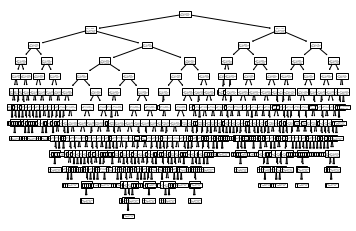

In [ ]:
tree.plot_tree(tr)

with outlier treatment


In [ ]:
tr = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
tr.fit(X_train,y_train)
y_pred2 = tr.predict(X_val)
rmse = mean_squared_error(y_pred2, y_val,squared=False)
print(rmse)

2389.5480418656316


# AdaBoost

- combina weak learners (decision trees)
- asigna pesos a los valores incorrectos
- considera errores pasados y crece de forma sequencial
- robusto al overfitting
- su performance es peor que XGBoost o random forest cuando se incluyen features irrelevantes

- cambia sample distribution con cada iteracion y los pesos


In [ ]:
ab = AdaBoostRegressor(n_estimators=25,random_state=0)
ab.fit(X_train,y_train)
y_pred4 = ab.predict(X_val)
rmse = mean_squared_error(y_pred4, y_val,squared=False)
print(rmse)

2658.1648394829904


with outlier treatment

In [ ]:
ab = AdaBoostRegressor(n_estimators=25,random_state=0)
ab.fit(X_train,y_train)
y_pred4 = ab.predict(X_val)
rmse = mean_squared_error(y_pred4, y_val,squared=False)
print(rmse)

2529.41236636601


## Gradient Boosting

- Los aprendedores debiles utilizan un score  y este se requiere minimizar durante el crecimiento del arbol

- Se utiliza el gradiente para calcular los valores optimos de cada hoja

- Entrena sobre el error

---------------------------------------------

- Weak learners use a score to be minimized in order to improve the tree growth

- The gradient is used to calculete the optimal o suboptimal values for each leaf

- train based on the error



In [ ]:
gb = GradientBoostingRegressor(n_estimators=40,learning_rate=1, random_state= 0)
gb.fit(X_train,y_train)
y_pred5 = gb.predict(X_val)
rmse = mean_squared_error(y_pred5, y_val,squared=False)
print(rmse)

2514.2014456359216


with outlier treatment

In [ ]:
gb = GradientBoostingRegressor(n_estimators=40,learning_rate=1, random_state= 0)
gb.fit(X_train,y_train)
y_pred5 = gb.predict(X_val)
rmse = mean_squared_error(y_pred5, y_val,squared=False)
print(rmse)

2385.080493136852


## XGBRegressor

- Introduce terminos de regularizacion, si estos terminos se establecen en 0 entonces el gradient boosting y el XGBoost deberian dar el mismo resultado.

- Agrega los metodos de coeficiente de aprendizaje de adaboost y la seleccion aleatoria de caracteristicas del random forest.

- Dificil de interpretar al tener un ensamble de modelos.

- Costoso computacionalmente

- El termino de regularizacion reduce eficazmente la varianza

- los aprendedores debiles utilizan un score  y este se requiere minimizar durante el crecimiento del arbol

- Se utiliza el gradiente para calcular los valores optimos de cada hoja

- level wise (tree growth)

---------------------------------------------------------------

- Enter regularization terms, if these terms are set to 0 then the gradient boosting anff XGBoost should give the same result.

- Add the adaboost learning coefficient and the random feature selection from the random forest

- difficult to interpret

- high computational complexity

- the regularization terme reduce the variance effectively

- the gradient is used to calculete the suboptimal values for each sheet

In [ ]:
xgb = XGBRegressor(learning_rate=.08,max_depth=8, min_child_weight=40, seed=0)
xgb.fit(X_train,y_train)
y_pred6 = xgb.predict(X_val)
rmse = mean_squared_error(y_pred6, y_val,squared=False)
print(rmse)

[01:22:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
2480.219228336327


with treatment of outliers 

In [ ]:
xgb = XGBRegressor(learning_rate=.08,max_depth=8, min_child_weight=40, seed=0)
xgb.fit(X_train,y_train)
y_pred6 = xgb.predict(X_val)
rmse = mean_squared_error(y_pred6, y_val,squared=False)
print(rmse)

[03:17:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
2342.9594899189956


## Ridge Regression

- Existe linealidad 
- varianza constante e independiente
- Es necesario estandarizar las variables
- Cuando los datos sufren de multicolinialidad
- Para detectarla se pueden obtener los eigenvalores de la matriz de correlacion y checar si son cercanos a cero
- Si algun coeficiente del modelo de regresion es del signo opuesto al que se podria esperar

------------------------------------------------

- Linear relationship
- Multivarate normality
- Multicollinearity
- its good try to standarize the features

In [ ]:
from sklearn.linear_model import Ridge
RR = Ridge(alpha=0.05)
RR.fit(X_train,y_train)
y_pred7 = RR.predict(X_val)

rmse = mean_squared_error(y_pred7, y_val,squared=False)
print(rmse)

2512.6029853112923


In [ ]:
importance = pd.Series(RR.coef_)
j = 0
for i in f:
  if j == 10:
    break
  print(features[i])
  j+=1

City_Category_B
City_Category_C
City_Category_A
Product_Category_2_0.0
Stay_In_Current_City_Years_1
Age_31
Product_Category_2_8.0
Product_Category_2_14.0
Age_41
Stay_In_Current_City_Years_2


with treatment of outliers

In [ ]:
  from sklearn.linear_model import Ridge
RR = Ridge(alpha=0.05)
RR.fit(X_train,y_train)
y_pred7 = RR.predict(X_val)

rmse = mean_squared_error(y_pred7, y_val,squared=False)
print(rmse)

2385.8774807115155


## Naive Bayes

- Cuando las variables X y el target Y son numericas y el conjunto de datos es largo es mejor utilizar un modelo de regresion lineal, sin embargo cuando se tienen variables categoritcas es mejor utilizar naive bayes

- Se utiliza en problemas de regresion logistica

- las caracteristicas son consideradas independientes o poco correlacionadas

------------------------------------------------------

- when the variables X and the target Y are numeric and the data set is large then is better to use a linear regression model, however when there are more categorical features then is better to use a naive bayes

- usually used in logistic regression 

- the features are considered independent or poorly correlated by assumption



In [ ]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X_train,y_train)
y_pred8 = clf.predict(X_val)


rmse = mean_squared_error(y_pred8, y_val,squared=False)
print(rmse)

4560.022477565215


with treatment of outliers

In [ ]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X_train,y_train)
y_pred8 = clf.predict(X_val)


rmse = mean_squared_error(y_pred8, y_val,squared=False)
print(rmse)

4296.773661415725


## SVM

Utiliza el algoritmo SMO algorithm usando libsvm y que tiene la siguiente complejidad computacional $O(n^2 * m)$ donde,

n es el numero de datos

m el numero de caracteristicas

-------------------------------------

it uses the SMO algorithm using libsvm which has the following computational complexity $O(n^2 * m)$ where:

n is the number of data

m the number of features



In [ ]:
from sklearn.svm import LinearSVC
model = LinearSVC(C=0.01, tol = 0.0001, verbose =1, random_state = 1001, max_iter=2000, dual = False)
svm1 = model.fit(X_train,y_train)
svm1pred =  svm1(X_val)

rmse = mean_squared_error(svm1pred, y_val,squared=False)
print(rmse)

[LibLinear]

## DEEP LEARNING APPROACH

## Deep Neural Network with Pytorch

In [ ]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim 
import torch.nn.functional as F 
from torch.utils.data import DataLoader 
import torchvision.datasets as datasets 
import torchvision.transforms as transforms 

In [ ]:
X = torch.from_numpy(np.asarray(X).astype(np.float32))
y = torch.from_numpy(np.asarray(y).astype(np.float32))
y = y.view(y.shape[0], 1)

In [ ]:
n_samples, n_features = X.shape

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42, shuffle=True)

In [ ]:
input_size = n_features
output_size = 1
learning_rate = 0.05
batch_size = 64
num_epochs = 1
    
class Regressor(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(input_size, 400)
        self.fc2 = nn.Linear(400, 250)
        self.fc3 = nn.Linear(250, 100)
        self.fc4 = nn.Linear(100, 30)
        self.fc5 = nn.Linear(30, 7)
        self.fc6 = nn.Linear(7, output_size)
        self.dropout = nn.Dropout(p=0.1)

    def forward(self, x):

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.dropout(F.relu(self.fc4(x)))
        x = self.dropout(F.relu(self.fc5(x)))
        x = self.dropout(F.relu(self.fc6(x)))
        #x = F.relu(self.fc1(x))
        #x = F.relu(self.fc3(x))

        return x

In [ ]:
input_size = n_features
output_size = 1

model = Regressor()
learning_rate = 0.05

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-2)  

num_epochs = 60
for epoch in range(num_epochs):
    y_predicted = model(X_train)
    loss = torch.sqrt(criterion(y_predicted, y_train))
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

epoch: 1, loss = 10581.7070
epoch: 2, loss = 10581.4961
epoch: 3, loss = 10573.6367
epoch: 4, loss = 10386.8877
epoch: 5, loss = 9207.5508
epoch: 6, loss = 6277.2471
epoch: 7, loss = 11458.1387
epoch: 8, loss = 5412.2373
epoch: 9, loss = 7290.4976
epoch: 10, loss = 7890.9497
epoch: 11, loss = 7644.3643
epoch: 12, loss = 6863.2266
epoch: 13, loss = 6991.0806
epoch: 14, loss = 6904.3149
epoch: 15, loss = 5932.8579
epoch: 16, loss = 5828.4902
epoch: 17, loss = 5578.3286
epoch: 18, loss = 5217.6880
epoch: 19, loss = 5602.3306
epoch: 20, loss = 5262.0464
epoch: 21, loss = 5295.8745
epoch: 22, loss = 5358.6475
epoch: 23, loss = 5158.1787
epoch: 24, loss = 5223.1353
epoch: 25, loss = 5149.7222
epoch: 26, loss = 4985.9111
epoch: 27, loss = 5013.3369
epoch: 28, loss = 4858.4321
epoch: 29, loss = 4897.3701
epoch: 30, loss = 4807.4463
epoch: 31, loss = 4788.2129
epoch: 32, loss = 4770.7212
epoch: 33, loss = 4748.8560
epoch: 34, loss = 4749.1987
epoch: 35, loss = 4727.6929
epoch: 36, loss = 4689.5

In [ ]:
y_predicted = model(X_val)
loss = torch.sqrt(criterion(y_predicted, y_val))
print(loss)

tensor(4694.6738, grad_fn=<SqrtBackward>)


# LightGBM 

- Extension del algoritmo de gradient boosting anadiendole un tipo de seleccion automatica de caracteristicas...EFB

- Se enfoca a ejemplos con grandes gradientes para acelerar el entrenamiento Gradient-based One-Side Sampling

- Cuando existen un monton de datos es mejor utilizar light por su complejidad computacional y se entrena de forma distribuida o paralela con el uso del GPU

---------------------------------------------------------

- It focuses on examples with large gradients to speed up the traning 

- Leaf wise (tree growth)

- Fast tranning, low memory, used in large dataset, parallel supported


In [ ]:
import lightgbm
from lightgbm import LGBMRegressor

In [ ]:
from sklearn.metrics import make_scorer
def rmse(predictions, targets): 
  return np.sqrt(((predictions - targets) ** 2).mean())

rmse_score = make_scorer(rmse, greater_is_better=False)

with preprocessing applied in all classifiers

In [ ]:
lgb = LGBMRegressor(metric = 'rmse', categorical_columns = categorical_columns,subsample = 0.5, num_leaves = 500, num_iterations =200,  random_state=0 )
param_test ={'learning_rate' : [0.05,0.1,0.2,0.3]}

Total_sets = 100

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
gs = RandomizedSearchCV(
    estimator=lgb, param_distributions=param_test, 
    n_iter=Total_sets,
    scoring=rmse_score,
    cv=4,
    refit=True,
    random_state=314,
    n_jobs = 4,
    verbose=True)
gs.fit(X_train, y_train)
print('Best score reached: {} with params: {} '.format(-1*gs.best_score_, gs.best_params_))

y_pred  = gs.predict(X_val)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 4 is smaller than n_iter=100. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 4 folds for each of 4 candidates, totalling 16 fits


[Parallel(n_jobs=4)]: Done  16 out of  16 | elapsed:  1.3min finished
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Best score reached: 2513.8721877254056 with params: {'learning_rate': 0.05} 


In [ ]:
score =  rmse = mean_squared_error(y_pred, y_val,squared=False)
print(score)

2555.3845278993804


With outlier treatment

In [ ]:
lgb = LGBMRegressor(metric = 'rmse', categorical_columns = categorical_columns,subsample = 0.5, num_leaves = 500, num_iterations =200,  random_state=0 )
param_test ={'learning_rate' : [0.05,0.1,0.2,0.3]}

Total_sets = 100

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
gs = RandomizedSearchCV(
    estimator=lgb, param_distributions=param_test, 
    n_iter=Total_sets,
    scoring=rmse_score,
    cv=4,
    refit=True,
    random_state=314,
    n_jobs = 4,
    verbose=True)
gs.fit(X_train, y_train)
print('Best score reached: {} with params: {} '.format(-1*gs.best_score_, gs.best_params_))

y_pred  = gs.predict(X_val)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 4 is smaller than n_iter=100. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 4 folds for each of 4 candidates, totalling 16 fits


[Parallel(n_jobs=4)]: Done  16 out of  16 | elapsed:  1.3min finished
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Best score reached: 2452.792592488645 with params: {'learning_rate': 0.05} 


In [ ]:
score =  rmse = mean_squared_error(y_pred, y_val,squared=False)
print(score)

2407.5488017184275


# Final results and conclusions

| Model / Error | No outlier treatment | outlier treatment  | other preprocessing|
| :- | -: | :-: ||
| Regresion lineal |  2513.015 | 2385.9293 | 2510.34
| Random Forest | 2568.7959 | 2417.9844 | 2381.20
| Arboles de Decision | 2521.6132 | 2389.5480 | 2431.78
| AdaBoost | 2658.1648 | 2529.4123 | 2646.21
| Gradient Boosting | 2514.2014 | 2514.2014 | 2373.10
| XGBRegressor | 2480.219 | 2342.9594 | 2310.68
| Regresion Rigida | 2512.6481 | 2385.8774 | 2385.87
| Bayes Ingenuo | 4560.0224 | 4296.7736 | 4056
| SVM | - | - | -
| Redes Neuronales Profundas |  4694.6738 | - | -
| Regresor LGBM | 2555.3845 | 2407.548 | 2366
| Ensamble de dos XGB | 2354.7713 | 2305.12 |


Conclusiones :

- El mejor regresor tuvo un error de 2305.12 en un conjunto de datos con 50,000 ejemplos. En la competencia original los mejores resultados se encuentran entre 2408.66 a 2484.62.

- El mejor modelo fue un ensamble de dos regresores XGBoost, aunque el tiempo de entrenamiento dura unos cuantos minutos. Para mejorar el rendimiento computacional se puede utilizar una regresion lineal o un LightGBM disminuyendo muy poco el accuracy del modelo.

- Para mejorar el modelo se puede buscar obtener mas datos, aplicar validacion cruzada con un ensamble para diferentes modelos, donde se tendria que dividir el conjunto en entrenamiento, validacion y prueba.

- Incluso en este nuevo ensamble se puede volver a aplicar un problema de optimizacion para obtener los pesos que le tocan a cada regresor.

- Si se buscara la interpretabilidad del modelo, sera conveniente utilizar un arbol de decision y graficar el arbol.

- Se puede volver a realizar la regresion considerando al Usuario y el Producto como variables categoricas.


Conclusions.

- The best regressor had an error of 2305.12 on a dataset with 50,000 examples. In the original competition the best results are between 2408.66 to 2484.62 

- The best model was an assambly of two XFBoost regressors, although the trainning time last a lot of minutes. In order to improve the computational performance you can use a linear regression or a LightGBM but this solution decrease the accuracy of the model very little.

- To improve the model you can seek to obtain more data, apply cross validation with an assembly for different types of models, where the dataset would have to be dividen in tranning, validation and testing.

- Even in this new assembly, an optimization problem can be reapplied to obtain the weights for each regressor.

- If the interpretability of the model is to be sought, it will be convinient to use a decision tree and graph that tree.

- You can perform the regression again considering the user and the product as categorical variables.








